In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
cwd = os.getcwd()

api_path = os.path.join(cwd, '..', 'tools', 'sampling_utils')
sys.path.append(api_path)

In [3]:
import numpy as np
import random
import sklearn

from matplotlib import pyplot as plt

import torch, torch.nn as nn
import torch.nn.functional as F


from sir_ais_sampling import (run_experiments_gaussians,
                              run_experiments_2_gaussians,
                              sir_correlated_dynamics,
                              sir_independent_dynamics)

from ebm_sampling import (citerais_mala_dynamics,
                          citerais_ula_dynamics,
                          langevin_dynamics,
                          i_ais_z_dynamics,
                          i_ais_v_dynamics,
                          i_ais_b_dynamics)

from distributions import (Target, 
                           Gaussian_mixture, 
                           IndependentNormal,
                           init_independent_normal,
                           init_independent_normal_scale)

from torch.distributions import (MultivariateNormal, 
                                 Normal, 
                                 Independent, 
                                 Uniform)

from metrics import Evolution
from general_utils import DotDict, send_file_to_remote
#from paths import path_to_save_remote, port_to_remote

# SIR, target = 1 gaussian

In [4]:
dim_arr = [30*(i + 1) for i in range(15)]  
var_proposal = 2.0
var_target = 1.0
loc_target = 1.0
loc_proposal = 0.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cpu') #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1
n_steps = 10000

In [31]:
N = 10
method_params = {'n_steps': n_steps, 'N': N}
random_seed = 42
method = 'sir_independent' 
mode_init = 'target'
print_results = True
results_independent = run_experiments_gaussians(dim_arr,  
                                                scale_proposal, 
                                                scale_target,
                                                loc_target, 
                                                num_points_in_chain, 
                                                strategy_mean,
                                                device,
                                                batch_size,
                                                method_params,
                                                random_seed=random_seed,
                                                mode_init=mode_init,
                                                method=method,
                                                print_results=print_results)

------------------
mode = target
dim = 30
mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.6707357168197632
mean estimation of mean = 0.9135206937789917
mean estimation of ess = 0.001000100010001
------
dim = 60
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.8079985508734353e-08
mean estimation of mean = 1.191179633140564
mean estimation of ess = 0.0
------
dim = 90
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.4157496508460099e-08
mean estimation of mean = 1.092042088508606
mean estimation of ess = 0.0
------
dim = 120
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.2208721145157142e-08
mean estimation of mean = 1.0500245094299316
mean estimation of ess = 0.0
------
dim = 150
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.2902584778373694e-08
mean estimation of mean = 1.0396488904953003
mean estimation of ess = 0.0
------
dim = 180
mean estimation of accepten

In [27]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 8))
name = f'SIR with independent proposals, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

axs[1].axhline(0.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
axs[2].set_xlabel('dim')
axs[2].set_ylabel('ess')

modes_to_plot = ['mean_var', 'mean_loc', 'ess']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')
    axs[i].plot(dim_arr, results_independent['target'][mode], marker='o')
    axs[i].plot(dim_arr, results_ais['target'][mode], marker='o')

for ax in axs:
    ax.grid()
    #ax.legend()

plt.show()

NameError: name 'results_ais' is not defined

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 8))
name = f'SIR with independent proposals, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

axs[1].axhline(0.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
axs[2].set_xlabel('dim')
axs[2].set_ylabel('ess')

modes_to_plot = ['mean_var', 'mean_loc', 'ess']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')
    axs[i].plot(dim_arr, results_independent['target'][mode], marker='o')

for ax in axs:
    ax.grid()
    #ax.legend()

path_to_plots = '/home/daniil/gans-mcmc/known_target_experiment/plots'
path_to_fig = os.path.join(path_to_plots, 'sir_independent_1_gaussian.pdf')
plt.savefig(path_to_fig)
send_file_to_remote(path_to_fig,
                    port_to_remote, 
                    path_to_save_remote)
plt.show()

NameError: name 'results_independent' is not defined

In [11]:
# fig, axs = plt.subplots(ncols=2, nrows=len(dim_arr), figsize=(15, 55))
# name = f'SIR with independent proposals, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}'
# fig.suptitle(name)

# for i, dim in enumerate(dim_arr):
#     axs[i][0].set_xlabel('MC iter')
#     axs[i][0].set_ylabel('first coord of sample')
#     #axs[i][0].plot(np.arange(len(dict_results['target']['history_first'][i])), 
#     #               dict_results['target']['history_first'][i], 
#     #               label=f'target init', marker='o')
#     axs[i][0].plot(np.arange(len(results_independent['proposal']['history_first'][i])), 
#                    results_independent['proposal']['history_first'][i], 
#                    label=f'proposal init', marker='o')
#     axs[i][0].set_title(f'dim = {dim}')
#     axs[i][0].grid()
#     axs[i][0].legend()

#     axs[i][1].set_xlabel('MC iter')
#     axs[i][1].set_ylabel('norm of sample')
#     #axs[i][1].plot(np.arange(len(dict_results['target']['history_norm'][i])), 
#     #               dict_results['target']['history_norm'][i], 
#     #               label='target init', marker='o')
#     axs[i][1].plot(np.arange(len(results_independent['proposal']['history_norm'][i])), 
#                    results_independent['proposal']['history_norm'][i], 
#                    label=f'proposal init', marker='o')
#     axs[i][1].set_title(f'dim = {dim}')
#     axs[i][1].grid()
#     axs[i][1].legend()


# plt.show()    

In [28]:
dim_arr_corr = [30*(i + 1) for i in range(15)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1
n_steps = 30000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_correlated' 
print_results = True
mode_init = 'proposal'
results_corr = run_experiments_gaussians(dim_arr_corr,  
                                                scale_proposal, 
                                                scale_target,
                                                loc_target, 
                                                num_points_in_chain, 
                                                strategy_mean,
                                                device,
                                                batch_size,
                                                method_params,
                                                random_seed=random_seed,
                                                mode_init=mode_init,
                                                method=method,
                                                print_results=print_results)

------------------
mode = proposal
dim = 30
cpu
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.0113160610198975
mean estimation of mean = 1.0053424835205078
mean estimation of ess = 0.7906
------
dim = 60
cpu
mean estimation of acceptence rate = 1.0
mean estimation of variance = 1.0047917366027832
mean estimation of mean = 1.0135246515274048
mean estimation of ess = 0.7976
------
dim = 90
cpu
mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.9775328040122986
mean estimation of mean = 1.0060880184173584
mean estimation of ess = 0.7807
------
dim = 120
cpu
mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.9919742345809937
mean estimation of mean = 1.0069468021392822
mean estimation of ess = 0.7981
------
dim = 150
cpu
mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.9802133440971375
mean estimation of mean = 1.0093941688537598
mean estimation of ess = 0.7904
------
dim = 180
cpu
mean estimatio

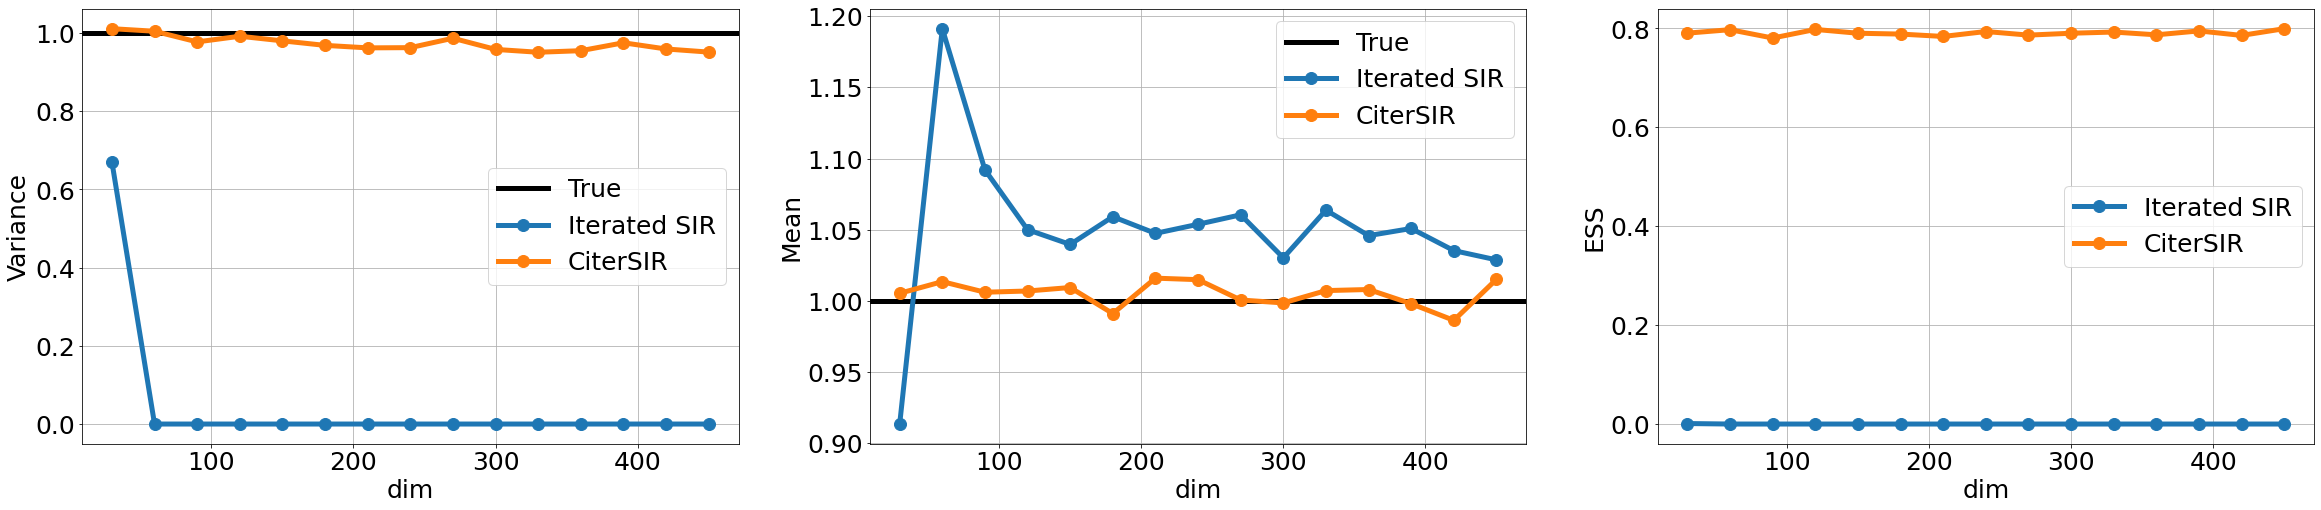

In [36]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})
linewidth = 5
markersize = 12

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(40, 8))
#name = f'SIR, N = {N}, num steps = {n_steps}, c = {c}, points in estimation = {num_points_in_chain}'
#fig.suptitle(name)

axs[0].axhline(var_target, label='True', color='black', linewidth = linewidth)
axs[0].set_xlabel('dim')
axs[0].set_ylabel('Variance')

axs[1].axhline(loc_target, label='True', color='black', linewidth = linewidth)
axs[1].set_xlabel('dim')
axs[1].set_ylabel('Mean')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('ESS')

modes_to_plot = ['mean_var', 'mean_loc', 'ess']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_corr['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_corr['proposal'][mode], label='proposal init', marker='o')
    axs[i].plot(dim_arr, results_independent['target'][mode], label = 'Iterated SIR', marker='o',
                markersize = markersize,
                linewidth = linewidth)
    axs[i].plot(dim_arr_corr, results_corr['proposal'][mode], label = 'CiterSIR', marker='o',
                markersize = markersize,
               linewidth = linewidth)

for ax in axs:
    ax.grid()
    ax.legend()

path_to_plots = '../figs' #'/home/daniil/gans-mcmc/known_target_experiment/plots'
path_to_fig = os.path.join(path_to_plots, 'sir_1_gaussian.pdf')
plt.savefig(path_to_fig)
# send_file_to_remote(path_to_fig,
#                     port_to_remote, 
#                     path_to_save_remote)    

plt.show()

In [ ]:
# fig, axs = plt.subplots(ncols=2, nrows=len(dim_arr), figsize=(15, 75))
# name = f'SIR with сorrelated proposals, N = {N}, num steps = {n_steps}, c = {c}, points in estimation = {num_points_in_chain}'
# fig.suptitle(name)

# for i, dim in enumerate(dim_arr):
#     axs[i][0].set_xlabel('MC iter')
#     axs[i][0].set_ylabel('first coord of sample')
#     axs[i][0].plot(np.arange(len(results_corr['proposal']['history_first'][i])), 
#                    results_corr['proposal']['history_first'][i], 
#                    label=f'proposal init', marker='o')
#     axs[i][0].set_title(f'dim = {dim}')
#     axs[i][0].grid()
#     axs[i][0].legend()

#     axs[i][1].set_xlabel('MC iter')
#     axs[i][1].set_ylabel('norm of sample')
#     axs[i][1].plot(np.arange(len(results_corr['proposal']['history_norm'][i])), 
#                    results_corr['proposal']['history_norm'][i], 
#                    label='proposal init', marker='o')
#     axs[i][1].set_title(f'dim = {dim}')
#     axs[i][1].grid()
#     axs[i][1].legend()


# plt.show()    

In [81]:
dim_arr = [30*(i + 1) for i in range(10)]  
var_proposal = 1.0
var_target = 2.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 10
n_steps = 50000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_correlated' 
print_results = True
mode_init = 'proposal'
results_add = run_experiments_gaussians(dim_arr,  
                                         scale_proposal, 
                                         scale_target, 
                                         num_points_in_chain, 
                                         strategy_mean,
                                         device,
                                         batch_size,
                                         method_params,
                                         random_seed,
                                         mode_init,
                                         method,
                                         print_results)

------------------
mode = proposal
dim = 30
mean estimation of variance = 1.9679615497589111
mean estimation of mean = -0.013693430460989475
mean estimation of ess = 0.8473747374737475
------
dim = 60
mean estimation of variance = 1.9376026391983032
mean estimation of mean = 0.0024218917824327946
mean estimation of ess = 0.8488548854885488
------
dim = 90
mean estimation of variance = 1.9066861867904663
mean estimation of mean = 0.007491488475352526
mean estimation of ess = 0.8501650165016501
------
dim = 120
mean estimation of variance = 1.8742953538894653
mean estimation of mean = 0.0036861300468444824
mean estimation of ess = 0.8490849084908489
------
dim = 150
mean estimation of variance = 1.8474078178405762
mean estimation of mean = 0.007857578806579113
mean estimation of ess = 0.8500550055005501
------
dim = 180
mean estimation of variance = 1.8296598196029663
mean estimation of mean = 0.004962598904967308
mean estimation of ess = 0.8501350135013501
------
dim = 210
mean estimati

# SIR, target = 2 gaussians

In [5]:
%autoreload 2

In [6]:
dim_arr_corr = [30*(i + 1) for i in range(10)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
loc_1_target = 1.0
loc_2_target = -1.0

num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 10
n_steps = 30000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_correlated' 
mode_init = 'proposal'
print_results = True
results_corr_2 = run_experiments_2_gaussians(dim_arr_corr,  
                                             scale_proposal, 
                                             scale_target,
                                             loc_1_target,
                                             loc_2_target,
                                             num_points_in_chain, 
                                             strategy_mean,
                                             device,
                                             batch_size,
                                             method_params=method_params,
                                             random_seed=random_seed,
                                             mode_init=mode_init,
                                             method=method,
                                             print_results=print_results)

------------------
mode = proposal
dim = 30
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.9686135591525297
mean estimation of 1 mode mean  = 0.9977919459342957
mean estimation of 2 mode mean  = -0.997014045715332
mean estimation of JSD  = 0.0357574500143528
mean estimation of HQR  = 0.9518900036811828
mean estimation of ESS = 0.7962196219621963
------
dim = 60
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.9643424504078556
mean estimation of 1 mode mean  = 0.9972604513168335
mean estimation of 2 mode mean  = -1.0050479173660278
mean estimation of JSD  = 0.036466626822948454
mean estimation of HQR  = 0.9571099936962127
mean estimation of ESS = 0.78997899789979
------
dim = 90
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.9728824461852564
mean estimation of 1 mode mean  = 0.9947401285171509
mean estimation of 2 mode mean  = -1.0011906623840332
mean estimation of JSD  = 0.03513070344924927

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Try to send file /home/daniil/gans-mcmc/known_target_experiment/plots/sir_correlated_2_gaussians.pdf to remote server....


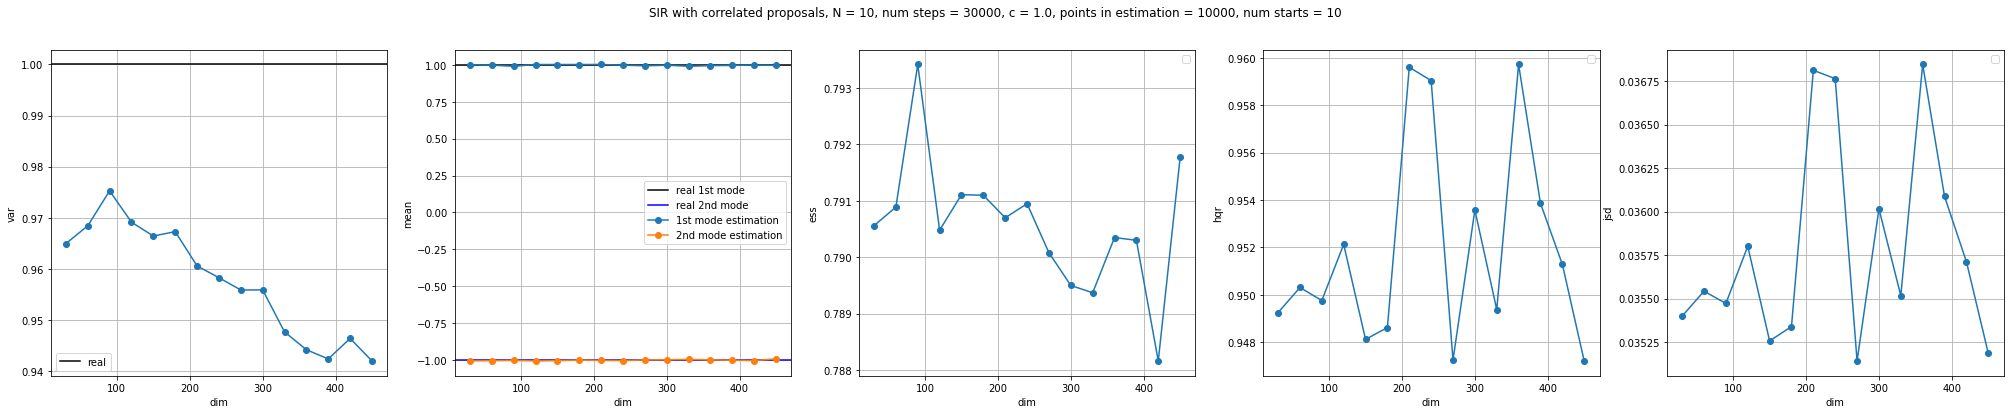

In [71]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(35, 6))
name = f'SIR with сorrelated proposals, N = {N}, num steps = {n_steps}, c = {c}, points in estimation = {num_points_in_chain}, num starts = {batch_size}'
fig.suptitle(name)

axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

axs[1].axhline(loc_1_target, label='real 1st mode', color='black')
axs[1].axhline(loc_2_target, label='real 2nd mode', color='blue')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('ess')

axs[3].set_xlabel('dim')
axs[3].set_ylabel('hqr')

axs[4].set_xlabel('dim')
axs[4].set_ylabel('jsd')

modes_to_plot = ['mean_var', 'mean_loc_1', 'mean_loc_2', 'ess', 'mean_hqr', 'mean_jsd']
for i, mode in enumerate(modes_to_plot):
    if i == 1:
        #axs[i].plot(dim_arr, results_corr['target']['mean_loc_1'], 
        #            label='target init, 1st mode estimation', marker='o')
        axs[i].plot(dim_arr, results_corr_2['proposal']['mean_loc_1'], 
                    label='1st mode estimation', marker='o')
        #axs[i].plot(dim_arr, results_corr['target']['mean_loc_2'], 
        #            label='target init, 2nd mode estimation', marker='o')
        axs[i].plot(dim_arr, results_corr_2['proposal']['mean_loc_2'], 
                    label='2nd mode estimation', marker='o')
    elif i == 2:
        pass
    else:
        if i == 0:
            j = 0
        else:
            j = i - 1
        #axs[j].plot(dim_arr, results_corr['target'][mode], label='target init', marker='o')
        axs[j].plot(dim_arr, results_corr_2['proposal'][mode], marker='o')
    
for ax in axs:
    ax.grid()
    ax.legend()
    
path_to_plots = '/home/daniil/gans-mcmc/known_target_experiment/plots'
path_to_fig = os.path.join(path_to_plots, 'sir_correlated_2_gaussians.pdf')
plt.savefig(path_to_fig)
send_file_to_remote(path_to_fig,
                    port_to_remote, 
                    path_to_save_remote) 

plt.show()

In [7]:
dim_arr = [30*(i + 1) for i in range(10)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
loc_1_target = 1.0
loc_2_target = -1.0

num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 10
n_steps = 30000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_independent' 
mode_init = 'proposal'
print_results = True
results_independent_2 = run_experiments_2_gaussians(dim_arr,  
                                                    scale_proposal, 
                                                    scale_target,
                                                    loc_1_target,
                                                    loc_2_target,
                                                    num_points_in_chain, 
                                                    strategy_mean,
                                                    device,
                                                    batch_size,
                                                    method_params=method_params,
                                                    random_seed=random_seed,
                                                    mode_init=mode_init,
                                                    method=method,
                                                    print_results=print_results)

------------------
mode = proposal
dim = 30
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.5243825841942915
mean estimation of 1 mode mean  = 0.8448823690414429
mean estimation of 2 mode mean  = -0.9168686270713806
mean estimation of JSD  = 0.06337433168664575
mean estimation of HQR  = 0.9115000009536743
mean estimation of ESS = 0.0049004900490049
------
dim = 60
mean estimation of acceptence rate = 1.0
mean estimation of target variance = nan
mean estimation of 1 mode mean  = 0.7269529700279236
mean estimation of 2 mode mean  = -0.7058718204498291
mean estimation of JSD  = 0.032702983170747754
mean estimation of HQR  = 0.5898400044068695
mean estimation of ESS = 0.00021002100210021002
------
dim = 90
Unfortunalely, no points were assigned to 2nd mode, default estimation - zero
mean estimation of acceptence rate = 1.0
mean estimation of target variance = nan
mean estimation of 1 mode mean  = 0.511035680770874
mean estimation of 2 mode mean  = nan
mean e

In [8]:
dim_arr_corr = dim_arr #[30*(i + 1) for i in range(15)]

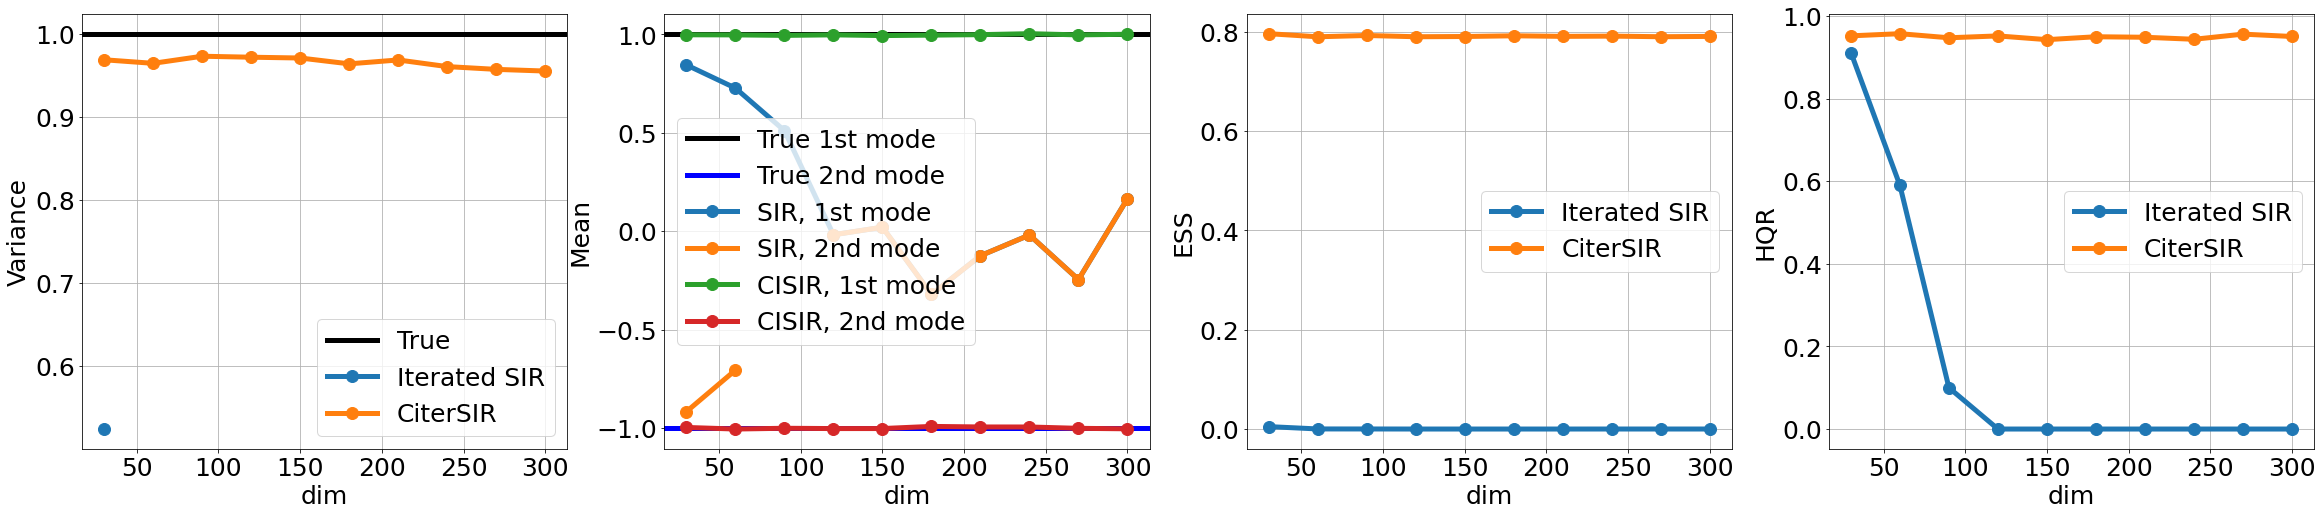

In [16]:
plt.rcParams.update({'font.size': 25})
linewidth = 5
markersize = 12

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(40, 8))
#name = f'SIR, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}, num starts = {batch_size}'
#fig.suptitle(name)

axs[0].axhline(var_target, label='True', color='black', linewidth = linewidth)
axs[0].set_xlabel('dim')
axs[0].set_ylabel('Variance')

axs[1].axhline(loc_1_target, label='True 1st mode', color='black', linewidth = linewidth)
axs[1].axhline(loc_2_target, label='True 2nd mode', color='blue', linewidth = linewidth)
axs[1].set_xlabel('dim')
axs[1].set_ylabel('Mean')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('ESS')

axs[3].set_xlabel('dim')
axs[3].set_ylabel('HQR')

# axs[4].set_xlabel('dim')
# axs[4].set_ylabel('JSD')

modes_to_plot = ['mean_var', 'mean_loc_1', 'mean_loc_2', 'ess', 'mean_hqr']#, 'mean_jsd']
for i, mode in enumerate(modes_to_plot):
    if i == 1:
        axs[i].plot(dim_arr, results_independent_2['proposal']['mean_loc_1'], 
                    label='SIR, 1st mode', marker='o', linewidth = linewidth, 
                   markersize = markersize )
        axs[i].plot(dim_arr, results_independent_2['proposal']['mean_loc_2'], 
                    label='SIR, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr_corr, results_corr_2['proposal']['mean_loc_1'], 
                    label='CISIR, 1st mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        #axs[i].plot(dim_arr, results_corr['target']['mean_loc_2'], 
        #            label='target init, 2nd mode estimation', marker='o')
        axs[i].plot(dim_arr_corr, results_corr_2['proposal']['mean_loc_2'], 
                    label='CISIR, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
    elif i == 2:
        pass
    else:
        if i == 0:
            j = 0
        else:
            j = i - 1
        axs[j].plot(dim_arr, results_independent_2['proposal'][mode], 
                    label='Iterated SIR', marker='o', linewidth = linewidth,
                   markersize  = markersize)
        axs[j].plot(dim_arr_corr, results_corr_2['proposal'][mode], 
                    label='CiterSIR', marker='o', linewidth = linewidth,
                   markersize  = markersize)
    
for ax in axs:
    ax.grid()
    ax.legend()
    
path_to_plots = '../figs' #'/home/daniil/gans-mcmc/known_target_experiment/plots'
path_to_fig = os.path.join(path_to_plots, 'sir_2_gaussians.png')
plt.savefig(path_to_fig)
# send_file_to_remote(path_to_fig,
#                     port_to_remote, 
#                     path_to_save_remote) 

plt.show()

# AIS

In [9]:
dim_arr = [2] + [30*(i + 1) for i in range(9)]  

loc_target = 3.0
loc_proposal = 0.0

var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 100
strategy_mean = 'starts' #'chain'
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
batch_size = 50
n_steps = 200 #5000

In [25]:
N = 5
T = 50

betas = np.linspace(1., 0., T)**.5
rhos = [0.9]*T

grad_step = 0.13
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rhos': rhos}
random_seed = 42
method = 'citerais_ula' 
mode_init = 'proposal'
print_results = True

results_сiterais_ula = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

  0%|          | 0/200 [00:00<?, ?it/s]------------------
mode = proposal
dim = 2
  0%|          | 1/200 [00:00<00:20,  9.94it/s]mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.84911048412323
mean estimation of mean = 3.004969358444214
mean estimation of ess = 0.7385999999999998
------
dim = 30
  0%|          | 1/200 [00:00<00:21,  9.10it/s]mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.8941237926483154
mean estimation of mean = 2.994694232940674
mean estimation of ess = 0.4224000000000001
------
dim = 60
  0%|          | 1/200 [00:00<00:24,  8.21it/s]mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.9324846863746643
mean estimation of mean = 2.987396478652954
mean estimation of ess = 0.3382
------
dim = 90
  0%|          | 1/200 [00:00<00:26,  7.61it/s]mean estimation of acceptence rate = 1.0
mean estimation of variance = 0.9668464660644531
mean estimation of mean = 2.986046075820923
mean estimation of ess = 0.3

In [18]:
random_seed = 42
method = 'ula'
mode_init = 'proposal'
print_results = True

grad_step = 0.1
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale}

results_ula = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 1.0
mean estimation of variance = 2.0598597526550293
mean estimation of mean = 3.032276153564453
mean estimation of ess = 1.0
------
dim = 30
mean estimation of acceptence rate = 1.0
mean estimation of variance = 2.0742204189300537
mean estimation of mean = 2.9790072441101074
mean estimation of ess = 1.0
------
dim = 60
mean estimation of acceptence rate = 1.0
mean estimation of variance = 2.133779764175415
mean estimation of mean = 2.9958717823028564
mean estimation of ess = 1.0
------
dim = 90
mean estimation of acceptence rate = 1.0
mean estimation of variance = 2.096442699432373
mean estimation of mean = 2.9979448318481445
mean estimation of ess = 1.0
------
dim = 120
mean estimation of acceptence rate = 1.0
mean estimation of variance = 2.1036758422851562
mean estimation of mean = 3.005734920501709
mean estimation of ess = 1.0
------
dim = 150
mean estimation of acceptence rate = 1.0
mean estimation of

In [12]:
random_seed = 42
method = 'mala'
mode_init = 'proposal'
print_results = True

grad_step = 0.1
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale}

results_mala = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = tensor([168., 167., 167., 164., 170., 167., 162., 167., 163., 170., 169., 173.,
        166., 166., 169., 159., 162., 169., 167., 165., 172., 169., 172., 170.,
        170., 169., 165., 168., 167., 174., 161., 161., 167., 168., 165., 169.,
        167., 167., 169., 161., 169., 161., 163., 165., 171., 169., 169., 164.,
        166., 179.])
mean estimation of variance = 0.9905228614807129
mean estimation of mean = 3.0274624824523926
mean estimation of ess = 0.8347999999999999
------
dim = 30
mean estimation of acceptence rate = tensor([101.,  78.,  83.,  88.,  80.,  91.,  92.,  80.,  83.,  98.,  89.,  71.,
         88.,  94.,  91.,  70.,  96.,  79.,  80.,  78.,  90.,  81.,  84.,  87.,
         84.,  83.,  81., 110.,  70.,  99.,  82.,  74.,  87., 105.,  64.,  89.,
         87.,  83.,  88.,  78.,  79.,  79.,  88.,  81.,  79.,  94.,  70.,  80.,
         92.,  90.])
mean estimation of variance = 1.000085115432739

In [101]:
N = 10

T = 100
betas = np.linspace(1., 0., T)

grad_step = 1e-1
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas}
random_seed = 42
method = 'i_ais_z' 
mode_init = 'proposal'
print_results = True

results_ais_z = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

  0%|          | 1/1000 [00:00<02:39,  6.25it/s]

------------------
mode = proposal
dim = 2


  0%|          | 1/1000 [00:00<02:42,  6.14it/s]

mean estimation of acceptence rate = 0.9956016540527344
mean estimation of variance = 1.0094916820526123
mean estimation of mean = 2.9952008724212646
mean estimation of ess = 1.0
------
dim = 30


  0%|          | 1/1000 [00:00<02:42,  6.16it/s]

mean estimation of acceptence rate = 0.9826899170875549
mean estimation of variance = 1.0394936800003052
mean estimation of mean = 3.0001168251037598
mean estimation of ess = 1.0
------
dim = 60


  0%|          | 1/1000 [00:00<02:38,  6.29it/s]

mean estimation of acceptence rate = 0.9771558046340942
mean estimation of variance = 1.0508629083633423
mean estimation of mean = 3.001079797744751
mean estimation of ess = 1.0
------
dim = 90


  0%|          | 1/1000 [00:00<02:35,  6.43it/s]

mean estimation of acceptence rate = 0.9735724329948425
mean estimation of variance = 1.053709864616394
mean estimation of mean = 2.9998722076416016
mean estimation of ess = 1.0
------
dim = 120


  0%|          | 1/1000 [00:00<02:40,  6.21it/s]

mean estimation of acceptence rate = 0.9708898663520813
mean estimation of variance = 1.0589863061904907
mean estimation of mean = 2.9990451335906982
mean estimation of ess = 1.0
------
dim = 150


  0%|          | 1/1000 [00:00<02:39,  6.25it/s]

mean estimation of acceptence rate = 0.9688553810119629
mean estimation of variance = 1.0632952451705933
mean estimation of mean = 2.9990553855895996
mean estimation of ess = 1.0
------
dim = 180


  0%|          | 1/1000 [00:00<02:38,  6.31it/s]

mean estimation of acceptence rate = 0.9671934247016907
mean estimation of variance = 1.0636357069015503
mean estimation of mean = 2.9995696544647217
mean estimation of ess = 1.0
------
dim = 210


  0%|          | 1/1000 [00:00<02:45,  6.04it/s]

mean estimation of acceptence rate = 0.9657918214797974
mean estimation of variance = 1.0665677785873413
mean estimation of mean = 3.0000147819519043
mean estimation of ess = 1.0
------
dim = 240


  0%|          | 1/1000 [00:00<02:45,  6.05it/s]

mean estimation of acceptence rate = 0.9646837115287781
mean estimation of variance = 1.0686955451965332
mean estimation of mean = 2.999887704849243
mean estimation of ess = 1.0
------
dim = 270


100%|██████████| 1000/1000 [02:41<00:00,  6.21it/s]


mean estimation of acceptence rate = 0.9636994004249573
mean estimation of variance = 1.0710464715957642
mean estimation of mean = 2.999701976776123
mean estimation of ess = 1.0
------


In [103]:
N = 10

T = 100
betas = np.linspace(1., 0., T)

grad_step = 1e-1
eps_scale = (2*grad_step)**0.5

rho = 1.0
method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

  0%|          | 1/1000 [00:00<02:40,  6.23it/s]

------------------
mode = proposal
dim = 2


  0%|          | 1/1000 [00:00<02:44,  6.07it/s]

mean estimation of acceptence rate = 0.9954167604446411
mean estimation of variance = 1.0138804912567139
mean estimation of mean = 3.003115653991699
mean estimation of ess = 1.0
------
dim = 30


  0%|          | 1/1000 [00:00<02:39,  6.27it/s]

mean estimation of acceptence rate = 0.9839482307434082
mean estimation of variance = 1.0501848459243774
mean estimation of mean = 2.9868385791778564
mean estimation of ess = 1.0
------
dim = 60


  0%|          | 1/1000 [00:00<02:39,  6.26it/s]

mean estimation of acceptence rate = 0.9800238609313965
mean estimation of variance = 1.057953953742981
mean estimation of mean = 2.984686851501465
mean estimation of ess = 1.0
------
dim = 90


  0%|          | 1/1000 [00:00<02:35,  6.43it/s]

mean estimation of acceptence rate = 0.9777852296829224
mean estimation of variance = 1.0659527778625488
mean estimation of mean = 2.9823639392852783
mean estimation of ess = 1.0
------
dim = 120


  0%|          | 1/1000 [00:00<02:45,  6.02it/s]

mean estimation of acceptence rate = 0.9764028787612915
mean estimation of variance = 1.0708767175674438
mean estimation of mean = 2.981959104537964
mean estimation of ess = 1.0
------
dim = 150


  0%|          | 1/1000 [00:00<02:48,  5.94it/s]

mean estimation of acceptence rate = 0.9754036664962769
mean estimation of variance = 1.0692031383514404
mean estimation of mean = 2.981412410736084
mean estimation of ess = 1.0
------
dim = 180


  0%|          | 1/1000 [00:00<02:41,  6.20it/s]

mean estimation of acceptence rate = 0.9746785163879395
mean estimation of variance = 1.0749632120132446
mean estimation of mean = 2.9822604656219482
mean estimation of ess = 1.0
------
dim = 210


  0%|          | 1/1000 [00:00<02:40,  6.23it/s]

mean estimation of acceptence rate = 0.974176287651062
mean estimation of variance = 1.0732409954071045
mean estimation of mean = 2.981896162033081
mean estimation of ess = 1.0
------
dim = 240


  0%|          | 1/1000 [00:00<02:44,  6.09it/s]

mean estimation of acceptence rate = 0.9737826585769653
mean estimation of variance = 1.07517671585083
mean estimation of mean = 2.980494737625122
mean estimation of ess = 1.0
------
dim = 270


100%|██████████| 1000/1000 [02:41<00:00,  6.17it/s]


mean estimation of acceptence rate = 0.973441481590271
mean estimation of variance = 1.0759360790252686
mean estimation of mean = 2.9804859161376953
mean estimation of ess = 1.0
------


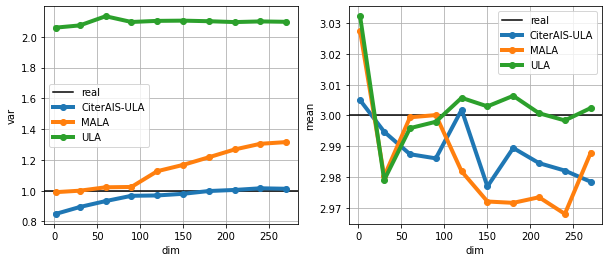

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
#name = f'AIS, N = {N}, T = {T}, rho = {rho}, num steps = {n_steps}, batchsize = {batch_size}'
#fig.suptitle(name)

# axs[0].set_xlabel('dim')
# axs[0].set_ylabel('acceptence rate')

axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

axs[1].axhline(loc_target, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
#axs[3].set_xlabel('dim')
#axs[3].set_ylabel('ess')

modes_to_plot = ['mean_var', 'mean_loc']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')
    #axs[i].plot(dim_arr, results_independent['target'][mode], marker='o')
    # axs[i].plot(dim_arr, results_ais['proposal'][mode], marker='o', label='ais')
    axs[i].plot(dim_arr, results_сiterais_ula['proposal'][mode], marker='o', label='CiterAIS-ULA', linewidth=4)
    axs[i].plot(dim_arr, results_mala['proposal'][mode], marker='o', label='MALA', linewidth=4)
    axs[i].plot(dim_arr, results_ula['proposal'][mode], marker='o', label='ULA', linewidth=4)
    #axs[i].plot(dim_arr, results_ais_b['proposal'][mode], marker='o', label='i-ais-b')
    # axs[i].plot(dim_arr, results_cais['proposal'][mode], marker='o', label='cais')

for ax in axs:
    ax.grid()
    ax.legend()

plt.savefig('../figs/citerais_ula_gaussian.pdf')
plt.show()

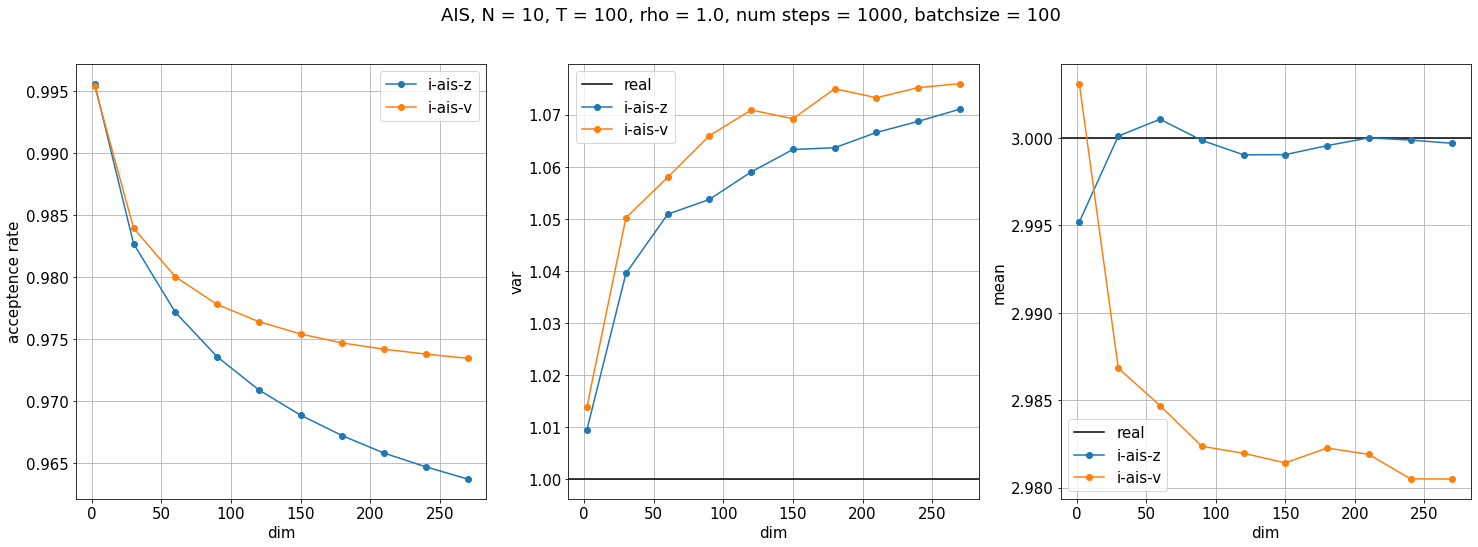

In [104]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 8))
name = f'AIS, N = {N}, T = {T}, rho = {rho}, num steps = {n_steps}, batchsize = {batch_size}'
fig.suptitle(name)

axs[0].set_xlabel('dim')
axs[0].set_ylabel('acceptence rate')

axs[1].axhline(1.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('var')

axs[2].axhline(3.0, label='real', color='black')
axs[2].set_xlabel('dim')
axs[2].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
#axs[3].set_xlabel('dim')
#axs[3].set_ylabel('ess')

modes_to_plot = ['acceptence', 'mean_var', 'mean_loc']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')
    #axs[i].plot(dim_arr, results_independent['target'][mode], marker='o')
    # axs[i].plot(dim_arr, results_ais['proposal'][mode], marker='o', label='ais')
    axs[i].plot(dim_arr, results_ais_z['proposal'][mode], marker='o', label='i-ais-z')
    axs[i].plot(dim_arr, results_ais_v['proposal'][mode], marker='o', label='i-ais-v')
    #axs[i].plot(dim_arr, results_ais_b['proposal'][mode], marker='o', label='i-ais-b')
    # axs[i].plot(dim_arr, results_cais['proposal'][mode], marker='o', label='cais')

for ax in axs:
    ax.grid()
    ax.legend()

#plt.savefig('../../fig.png')
plt.show()

In [9]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 1.0
method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rho': rho}
random_seed = 42
method = 'i_ais_z' 
mode_init = 'proposal'
print_results = True

results_ais_z = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9511834979057312
mean estimation of variance = 0.9995646476745605
mean estimation of mean = 3.011035203933716
mean estimation of ess = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8246269226074219
mean estimation of variance = 1.0486921072006226
mean estimation of mean = 3.000185251235962
mean estimation of ess = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.7842567563056946
mean estimation of variance = 1.0950356721878052
mean estimation of mean = 3.000074625015259
mean estimation of ess = 1.0
------
dim = 90
mean estimation of acceptence rate = 0.7651194334030151
mean estimation of variance = 1.1314855813980103
mean estimation of mean = 3.0001535415649414
mean estimation of ess = 1.0
------
dim = 120
mean estimation of acceptence rate = 0.7548710703849792
mean estimation of variance = 1.1580870151519775
mean estimation of mean = 2.999005079269409
mean estimation of ess = 1.0
-

In [10]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 1.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9511701464653015
mean estimation of variance = 0.996468722820282
mean estimation of mean = 2.999802589416504
mean estimation of ess = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8313683271408081
mean estimation of variance = 1.0561604499816895
mean estimation of mean = 2.999819755554199
mean estimation of ess = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.7971377372741699
mean estimation of variance = 1.1009241342544556
mean estimation of mean = 2.999849557876587
mean estimation of ess = 1.0
------
dim = 90
mean estimation of acceptence rate = 0.782699465751648
mean estimation of variance = 1.1361624002456665
mean estimation of mean = 3.00089693069458
mean estimation of ess = 1.0
------
dim = 120
mean estimation of acceptence rate = 0.7763913869857788
mean estimation of variance = 1.1621472835540771
mean estimation of mean = 3.00054931640625
mean estimation of ess = 1.0
------

In [11]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 1.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_b' 
mode_init = 'proposal'
print_results = True

results_ais_b = run_experiments_gaussians(dim_arr,  
                                          scale_proposal, 
                                          scale_target, 
                                          loc_target,
                                          num_points_in_chain, 
                                          strategy_mean,
                                          device,
                                          batch_size,
                                          method_params,
                                          random_seed = random_seed,
                                          loc_proposal = loc_proposal,
                                          mode_init = mode_init,
                                          method = method,
                                          print_results = print_results) 

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9511472582817078
mean estimation of variance = 1.0038021802902222
mean estimation of mean = 3.0015902519226074
mean estimation of ess = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8299113512039185
mean estimation of variance = 1.057420015335083
mean estimation of mean = 2.9988338947296143
mean estimation of ess = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.794467031955719
mean estimation of variance = 1.0982493162155151
mean estimation of mean = 2.9980814456939697
mean estimation of ess = 1.0
------
dim = 90
mean estimation of acceptence rate = 0.7794828414916992
mean estimation of variance = 1.1360507011413574
mean estimation of mean = 3.000711679458618
mean estimation of ess = 1.0
------
dim = 120
mean estimation of acceptence rate = 0.7724249362945557
mean estimation of variance = 1.162039875984192
mean estimation of mean = 2.999849557876587
mean estimation of ess = 1.0
--

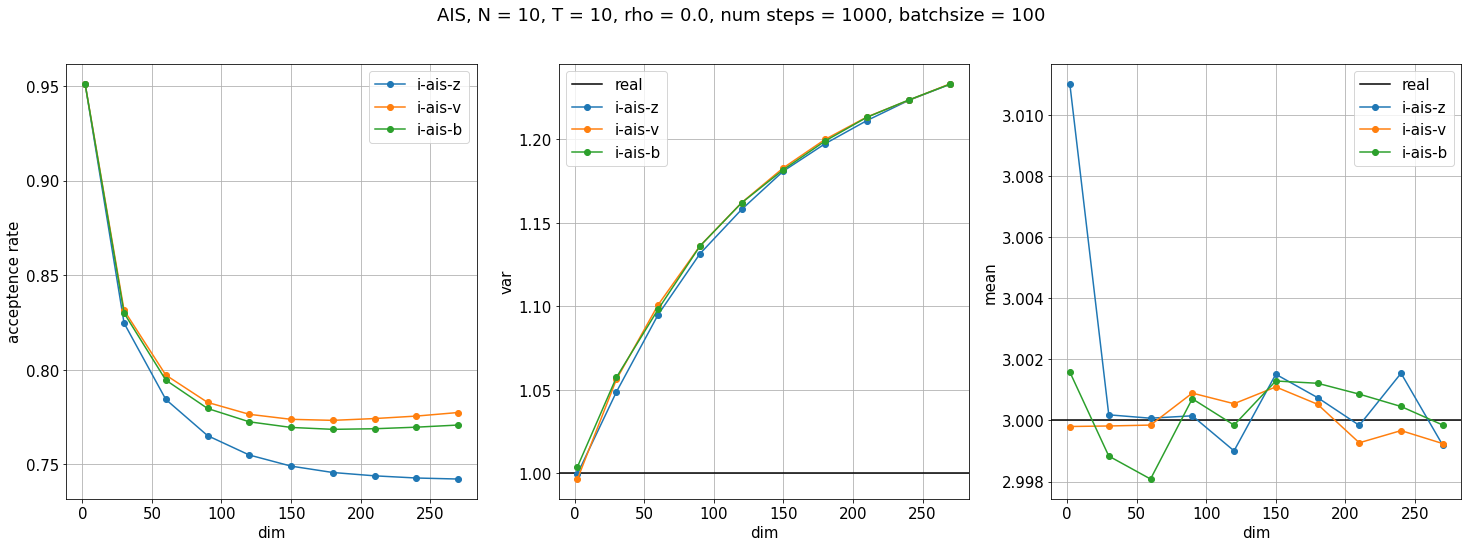

In [97]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 8))
name = f'AIS, N = {N}, T = {T}, rho = {rho}, num steps = {n_steps}, batchsize = {batch_size}'
fig.suptitle(name)

axs[0].set_xlabel('dim')
axs[0].set_ylabel('acceptence rate')

axs[1].axhline(1.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('var')

axs[2].axhline(3.0, label='real', color='black')
axs[2].set_xlabel('dim')
axs[2].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
#axs[3].set_xlabel('dim')
#axs[3].set_ylabel('ess')

modes_to_plot = ['acceptence', 'mean_var', 'mean_loc']
for i, mode in enumerate(modes_to_plot):
    #axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    #axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')
    #axs[i].plot(dim_arr, results_independent['target'][mode], marker='o')
    # axs[i].plot(dim_arr, results_ais['proposal'][mode], marker='o', label='ais')
    axs[i].plot(dim_arr, results_ais_z['proposal'][mode], marker='o', label='i-ais-z')
    axs[i].plot(dim_arr, results_ais_v['proposal'][mode], marker='o', label='i-ais-v')
    axs[i].plot(dim_arr, results_ais_b['proposal'][mode], marker='o', label='i-ais-b')
    # axs[i].plot(dim_arr, results_cais['proposal'][mode], marker='o', label='cais')

for ax in axs:
    ax.grid()
    ax.legend()

#plt.savefig('../../fig.png')
plt.show()

In [29]:
dim_arr = [2] + [30*(i + 1) for i in range(9)]  

num_points_in_chain = 100
strategy_mean = 'chain' #'chain'
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
batch_size = 1
n_steps = 200 #5000

var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
loc_proposal = 0.0
loc_1_target = 3.0
loc_2_target = -3.0

In [30]:
N = 5
T = 50

betas = np.linspace(1., 0., T)**.5
rhos = [0.9]*T

grad_step = 0.13
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rhos': rhos,
                 'pbern': 1.0}
random_seed = 42
method = 'citerais_ula' 
mode_init = 'proposal'
print_results = True

results_citerais_ula = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

  0%|          | 0/200 [00:00<?, ?it/s]------------------
mode = proposal
dim = 2
  0%|          | 1/200 [00:00<00:22,  8.83it/s]mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.7654253672573219
mean estimation of 1 mode mean  = 3.09912109375
mean estimation of 2 mode mean  = -2.9345107078552246
mean estimation of JSD  = 0.004890685901045799
mean estimation of HQR  = 0.9700000286102295
mean estimation of ESS = 0.8282828282828283
------
dim = 30
  0%|          | 0/200 [00:00<?, ?it/s]mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.765727538323123
mean estimation of 1 mode mean  = 2.970595598220825
mean estimation of 2 mode mean  = -3.075978994369507
mean estimation of JSD  = 0.007324356585741043
mean estimation of HQR  = 1.0
mean estimation of ESS = 0.40404040404040403
------
dim = 60
  0%|          | 1/200 [00:00<00:23,  8.61it/s]mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.673709910776384

In [34]:
method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rhos': rhos}
random_seed = 42
method = 'ula' 
mode_init = 'proposal'
print_results = True

results_ula = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

------------------
mode = proposal
dim = 2
Unfortunalely, no points were assigned to 2nd mode, default estimation - zero
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 0.9453185960683506
mean estimation of 1 mode mean  = 2.886085033416748
mean estimation of 2 mode mean  = nan
mean estimation of JSD  = 0.03415479511022568
mean estimation of HQR  = 0.9399999976158142
mean estimation of ESS = 1.0
------
dim = 30
Unfortunalely, no points were assigned to 1st mode, default estimation - zero
mean estimation of acceptence rate = 1.0
mean estimation of target variance = 1.1409641248315125
mean estimation of 1 mode mean  = nan
mean estimation of 2 mode mean  = -3.074692964553833
mean estimation of JSD  = 0.04246126487851143
mean estimation of HQR  = 0.17000000178813934
mean estimation of ESS = 1.0
------
dim = 60
Unfortunalely, no points were assigned to 1st mode, default estimation - zero
Unfortunalely, no points were assigned to 2nd mode, default estimation - ze

In [35]:
method_params = {'n_steps': n_steps, 
                 'N': N, 
                 'grad_step': grad_step, 
                 'eps_scale': eps_scale, 
                 'betas': betas,
                 'rhos': rhos}
random_seed = 42
method = 'mala' 
mode_init = 'proposal'
print_results = True

results_mala = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

------------------
mode = proposal
dim = 2
Unfortunalely, no points were assigned to 2nd mode, default estimation - zero
mean estimation of acceptence rate = tensor([160.])
mean estimation of target variance = 0.7439520252832068
mean estimation of 1 mode mean  = 2.928905963897705
mean estimation of 2 mode mean  = nan
mean estimation of JSD  = 0.04104483872652054
mean estimation of HQR  = 0.9900000095367432
mean estimation of ESS = 0.7676767676767676
------
dim = 30
Unfortunalely, no points were assigned to 1st mode, default estimation - zero
mean estimation of acceptence rate = tensor([65.])
mean estimation of target variance = 0.7013423153426999
mean estimation of 1 mode mean  = nan
mean estimation of 2 mode mean  = -2.99338436126709
mean estimation of JSD  = 0.04247488081455231
mean estimation of HQR  = 1.0
mean estimation of ESS = 0.30303030303030304
------
dim = 60
Unfortunalely, no points were assigned to 2nd mode, default estimation - zero
mean estimation of acceptence rate = ten

In [37]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 0.99
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2 = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

  0%|          | 1/1000 [00:00<01:59,  8.33it/s]

------------------
mode = proposal
dim = 2


  0%|          | 1/1000 [00:00<01:59,  8.38it/s]

mean estimation of acceptence rate = 0.853964626789093
mean estimation of target variance = 0.8731001708867012
mean estimation of 1 mode mean  = 2.9024295806884766
mean estimation of 2 mode mean  = -2.854933738708496
mean estimation of JSD  = 0.011557918041944504
mean estimation of HQR  = 1.0
mean estimation of ESS = 0.8181818181818182
------
dim = 30


  0%|          | 1/1000 [00:00<02:00,  8.28it/s]

Unfortunalely, no points were assigned to 1st mode, default estimation - zero
mean estimation of acceptence rate = 0.7475875616073608
mean estimation of target variance = 1.332566669892282e-13
mean estimation of 1 mode mean  = nan
mean estimation of 2 mode mean  = -2.9235005378723145
mean estimation of JSD  = 0.04247488081455231
mean estimation of HQR  = 1.0
mean estimation of ESS = 0.0
------
dim = 60


 12%|█▏        | 123/1000 [00:14<01:44,  8.38it/s]


KeyboardInterrupt: 

In [16]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas}
random_seed = 42
method = 'i_ais_z' 
mode_init = 'proposal'
print_results = True

results_ais_z_2 = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9501599073410034
mean estimation of target variance = 0.8360559734957866
mean estimation of 1 mode mean  = 2.9927031993865967
mean estimation of 2 mode mean  = -2.978496789932251
mean estimation of JSD  = 0.0012547636078667778
mean estimation of HQR  = 0.9489999985694886
mean estimation of ESS = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8246250152587891
mean estimation of target variance = 1.0094154927167391
mean estimation of 1 mode mean  = 2.9970498085021973
mean estimation of 2 mode mean  = -2.9973626136779785
mean estimation of JSD  = 0.0007290504942648112
mean estimation of HQR  = 0.9347000014781952
mean estimation of ESS = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.7842562794685364
mean estimation of target variance = 1.054222069437614
mean estimation of 1 mode mean  = 3.000354290008545
mean estimation of 2 mode mean  = -3.00114107131958
mean estimation of JSD  = 0.0

In [15]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 0.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2 = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9490920901298523
mean estimation of target variance = 0.8479773402465414
mean estimation of 1 mode mean  = 2.999382972717285
mean estimation of 2 mode mean  = -3.0059633255004883
mean estimation of JSD  = 0.0017562845977954567
mean estimation of HQR  = 0.9503000038862228
mean estimation of ESS = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8291019797325134
mean estimation of target variance = 1.011074851546863
mean estimation of 1 mode mean  = 2.9995076656341553
mean estimation of 2 mode mean  = -3.0011279582977295
mean estimation of JSD  = 0.002257901676930487
mean estimation of HQR  = 0.9250000047683716
mean estimation of ESS = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.7946879267692566
mean estimation of target variance = 1.0548489045985134
mean estimation of 1 mode mean  = 3.0023205280303955
mean estimation of 2 mode mean  = -2.998466968536377
mean estimation of JSD  = 0.

In [17]:
N = 10

T = 50
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

rho = 0.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_b' 
mode_init = 'proposal'
print_results = True

results_ais_b_2 = run_experiments_2_gaussians(dim_arr,
                                              scale_proposal,
                                              scale_target,
                                              loc_1_target,
                                              loc_2_target,
                                              num_points_in_chain,
                                              strategy_mean,
                                              device,
                                              batch_size,
                                              method_params,
                                              random_seed=random_seed,
                                              loc_proposal=loc_proposal,
                                              mode_init=mode_init,
                                              method=method,
                                              print_results=print_results)

------------------
mode = proposal
dim = 2
mean estimation of acceptence rate = 0.9490488171577454
mean estimation of target variance = 0.8516945264056248
mean estimation of 1 mode mean  = 2.9858603477478027
mean estimation of 2 mode mean  = -2.978433132171631
mean estimation of JSD  = 0.0014331762189976872
mean estimation of HQR  = 0.9502000039815903
mean estimation of ESS = 1.0
------
dim = 30
mean estimation of acceptence rate = 0.8291175961494446
mean estimation of target variance = 1.0156596587007918
mean estimation of 1 mode mean  = 3.000274658203125
mean estimation of 2 mode mean  = -3.001983642578125
mean estimation of JSD  = 0.002182794127147645
mean estimation of HQR  = 0.9281000030040741
mean estimation of ESS = 1.0
------
dim = 60
mean estimation of acceptence rate = 0.794581949710846
mean estimation of target variance = 1.0596381950893323
mean estimation of 1 mode mean  = 2.9989256858825684
mean estimation of 2 mode mean  = -3.000972032546997
mean estimation of JSD  = 0.00

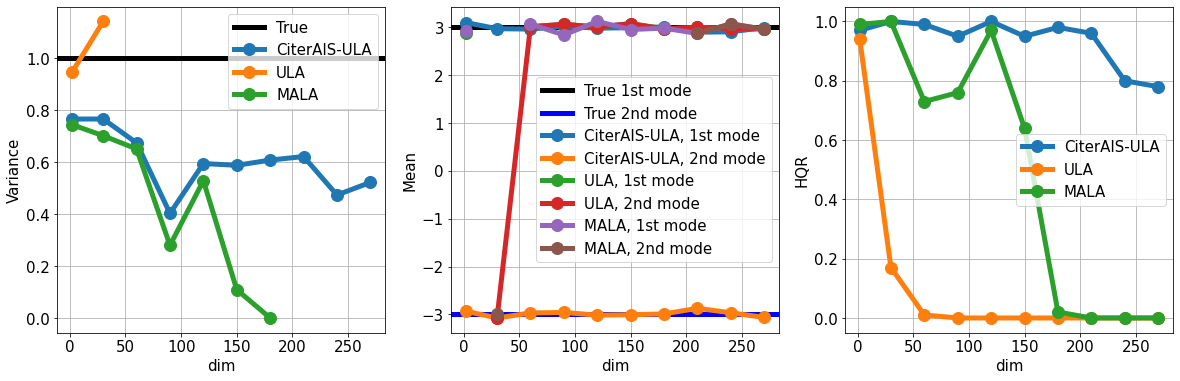

In [39]:
plt.rcParams.update({'font.size': 15})
linewidth = 5
markersize = 12

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
#name = f'SIR, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}, num starts = {batch_size}'
#fig.suptitle(name)

axs[0].axhline(var_target, label='True', color='black', linewidth = linewidth)
axs[0].set_xlabel('dim')
axs[0].set_ylabel('Variance')

axs[1].axhline(loc_1_target, label='True 1st mode', color='black', linewidth = linewidth)
axs[1].axhline(loc_2_target, label='True 2nd mode', color='blue', linewidth = linewidth)
axs[1].set_xlabel('dim')
axs[1].set_ylabel('Mean')

#axs[2].set_xlabel('dim')
#axs[2].set_ylabel('ESS')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('HQR')

# axs[3].set_xlabel('dim')
# axs[3].set_ylabel('JSD')

# axs[4].set_xlabel('dim')
# axs[4].set_ylabel('acceptence rate')

modes_to_plot = ['mean_var', 'mean_loc_1', 'mean_loc_2', 'mean_hqr']#, 'mean_jsd']
for i, mode in enumerate(modes_to_plot):
    if i == 1:
        axs[i].plot(dim_arr, results_citerais_ula['proposal']['mean_loc_1'], 
                    label='CiterAIS-ULA, 1st mode', marker='o', linewidth = linewidth, 
                   markersize = markersize )
        axs[i].plot(dim_arr, results_citerais_ula['proposal']['mean_loc_2'], 
                    label='CiterAIS-ULA, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_ula['proposal']['mean_loc_1'], 
                    label='ULA, 1st mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        #axs[i].plot(dim_arr, results_corr['target']['mean_loc_2'], 
        #            label='target init, 2nd mode estimation', marker='o')
        axs[i].plot(dim_arr, results_ula['proposal']['mean_loc_2'], 
                    label='ULA, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_mala['proposal']['mean_loc_1'], 
                    label='MALA, 1st mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_mala['proposal']['mean_loc_2'], 
                    label='MALA, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
    elif i == 2:
        pass
    else:
        if i == 0:
            j = 0
        else:
            j = i - 1
        axs[j].plot(dim_arr, results_citerais_ula['proposal'][mode], 
                    label='CiterAIS-ULA', marker='o', linewidth = linewidth,
                   markersize  = markersize)
        axs[j].plot(dim_arr, results_ula['proposal'][mode], 
                    label='ULA', marker='o', linewidth = linewidth,
                   markersize  = markersize)
        axs[j].plot(dim_arr, results_mala['proposal'][mode], 
                    label='MALA', marker='o', linewidth = linewidth,
                   markersize  = markersize)
    
for ax in axs:
    ax.grid()
    ax.legend()

plt.savefig('../figs/citerais_ula_2_gaussians.pdf')
plt.show()

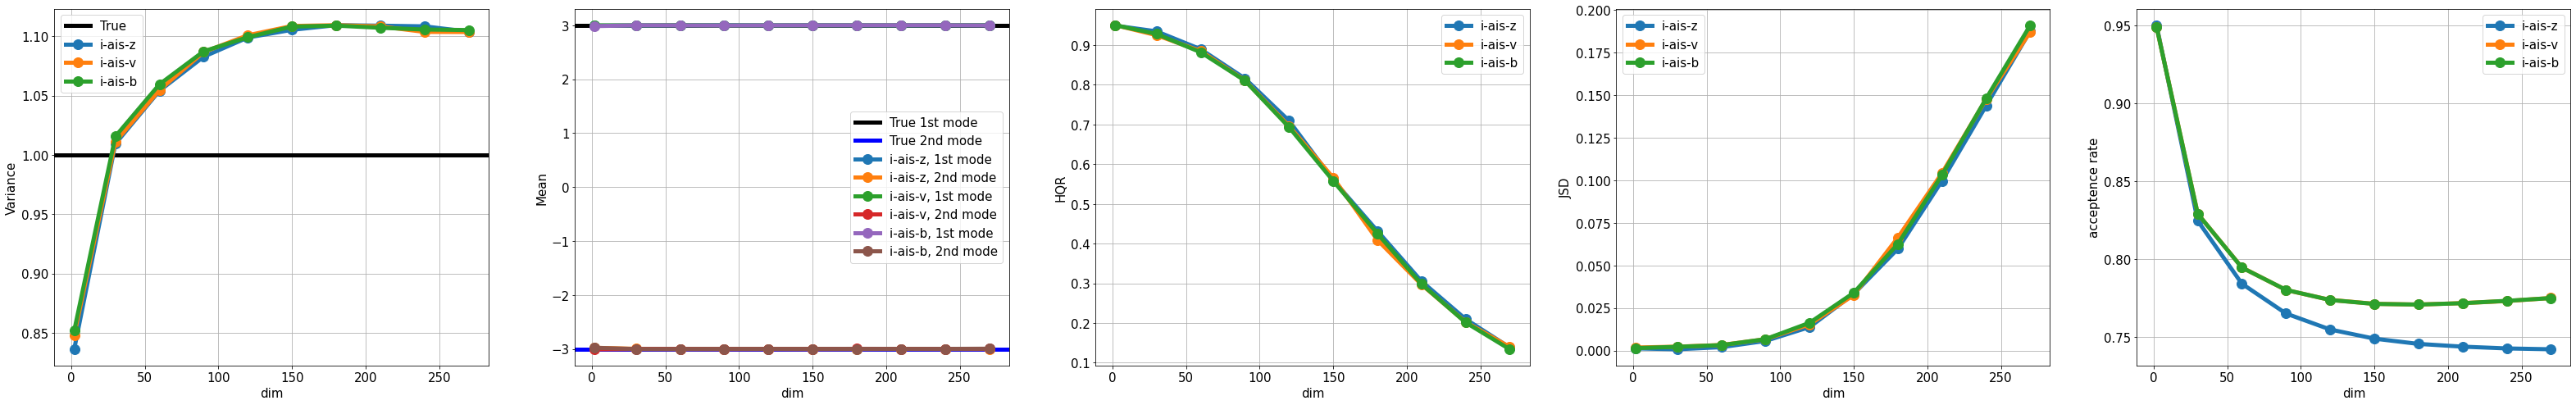

In [24]:
plt.rcParams.update({'font.size': 15})
linewidth = 5
markersize = 12

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(55, 8))
#name = f'SIR, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}, num starts = {batch_size}'
#fig.suptitle(name)

axs[0].axhline(var_target, label='True', color='black', linewidth = linewidth)
axs[0].set_xlabel('dim')
axs[0].set_ylabel('Variance')

axs[1].axhline(loc_1_target, label='True 1st mode', color='black', linewidth = linewidth)
axs[1].axhline(loc_2_target, label='True 2nd mode', color='blue', linewidth = linewidth)
axs[1].set_xlabel('dim')
axs[1].set_ylabel('Mean')

#axs[2].set_xlabel('dim')
#axs[2].set_ylabel('ESS')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('HQR')

axs[3].set_xlabel('dim')
axs[3].set_ylabel('JSD')

axs[4].set_xlabel('dim')
axs[4].set_ylabel('acceptence rate')

modes_to_plot = ['mean_var', 'mean_loc_1', 'mean_loc_2', 'mean_hqr', 'mean_jsd', 'acceptence']
for i, mode in enumerate(modes_to_plot):
    if i == 1:
        axs[i].plot(dim_arr, results_ais_z_2['proposal']['mean_loc_1'], 
                    label='i-ais-z, 1st mode', marker='o', linewidth = linewidth, 
                   markersize = markersize )
        axs[i].plot(dim_arr, results_ais_z_2['proposal']['mean_loc_2'], 
                    label='i-ais-z, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_ais_v_2['proposal']['mean_loc_1'], 
                    label='i-ais-v, 1st mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        #axs[i].plot(dim_arr, results_corr['target']['mean_loc_2'], 
        #            label='target init, 2nd mode estimation', marker='o')
        axs[i].plot(dim_arr, results_ais_v_2['proposal']['mean_loc_2'], 
                    label='i-ais-v, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_ais_b_2['proposal']['mean_loc_1'], 
                    label='i-ais-b, 1st mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
        axs[i].plot(dim_arr, results_ais_b_2['proposal']['mean_loc_2'], 
                    label='i-ais-b, 2nd mode', marker='o', linewidth = linewidth,
                   markersize  = markersize )
    elif i == 2:
        pass
    else:
        if i == 0:
            j = 0
        else:
            j = i - 1
        axs[j].plot(dim_arr, results_ais_z_2['proposal'][mode], 
                    label='i-ais-z', marker='o', linewidth = linewidth,
                   markersize  = markersize)
        axs[j].plot(dim_arr, results_ais_v_2['proposal'][mode], 
                    label='i-ais-v', marker='o', linewidth = linewidth,
                   markersize  = markersize)
        axs[j].plot(dim_arr, results_ais_b_2['proposal'][mode], 
                    label='i-ais-b', marker='o', linewidth = linewidth,
                   markersize  = markersize)
    
for ax in axs:
    ax.grid()
    ax.legend()

#plt.savefig('../../fig.png')
plt.show()

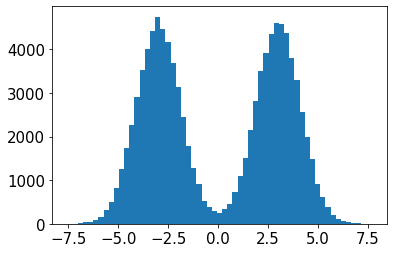

In [22]:
_ = plt.hist(results_ais_b_2[mode_init]['history_first'][-1].reshape(-1), bins='auto')

# 25 Gaussians

In [8]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
sigma = 0.05
n_dim = 2
target_args = DotDict()
target_args.device = device
target_args.num_gauss = 25
n_col = 5
n_row = target_args.num_gauss // n_col
s = 1
###create points

coef_gaussian = 1./target_args.num_gauss
target_args.p_gaussians = [torch.tensor(coef_gaussian)]*target_args.num_gauss
locs = [torch.tensor([(i-2)*s,(j-2)*s] + [0]* (n_dim - 2)).to(device) 
        for i in range(n_col) for j in range(n_row)]
target_args.locs = locs
target_args.covs = [(sigma**2)*torch.eye(n_dim).to(device)]*target_args.num_gauss
target_args.dim = n_dim
true_target = Gaussian_mixture(target_args).log_prob

In [9]:
s = 1
dim = 2
locs = [torch.tensor([(i-2)*s,(j-2)*s] + [0]* (dim - 2)).to(device) 
            for i in range(n_col) for j in range(n_row)]

In [10]:
locs

[tensor([-2, -2], device='cuda:1'),
 tensor([-2, -1], device='cuda:1'),
 tensor([-2,  0], device='cuda:1'),
 tensor([-2,  1], device='cuda:1'),
 tensor([-2,  2], device='cuda:1'),
 tensor([-1, -2], device='cuda:1'),
 tensor([-1, -1], device='cuda:1'),
 tensor([-1,  0], device='cuda:1'),
 tensor([-1,  1], device='cuda:1'),
 tensor([-1,  2], device='cuda:1'),
 tensor([ 0, -2], device='cuda:1'),
 tensor([ 0, -1], device='cuda:1'),
 tensor([0, 0], device='cuda:1'),
 tensor([0, 1], device='cuda:1'),
 tensor([0, 2], device='cuda:1'),
 tensor([ 1, -2], device='cuda:1'),
 tensor([ 1, -1], device='cuda:1'),
 tensor([1, 0], device='cuda:1'),
 tensor([1, 1], device='cuda:1'),
 tensor([1, 2], device='cuda:1'),
 tensor([ 2, -2], device='cuda:1'),
 tensor([ 2, -1], device='cuda:1'),
 tensor([2, 0], device='cuda:1'),
 tensor([2, 1], device='cuda:1'),
 tensor([2, 2], device='cuda:1')]

In [14]:
def run_experiment_gaussians_2d(scale_proposal, 
                                scale_target, 
                                num_points_in_chain, 
                                strategy_mean,
                                device,
                                batch_size,
                                method_params,
                                random_seed=42,
                                loc_proposal=0.0,
                                mode_init='proposal',
                                method='sir_independent',
                                print_results=True):
    dict_results = {mode_init: {'mean_loc': [], 
                                'mean_var': [], 
                                'mean_jsd': [],
                                'mean_hqr': [],
                                'ess': [], 
                                'history_first': [], 
                                'history_norm': []}}
   
    if print_results:
        print("------------------")
        print(f"method = {method}")
        print(f"mode = {mode_init}")
   
    dim = 2
    num_gauss = 25
    
    if print_results:
        print(f"dim = {dim}")

    target_args = DotDict()
    target_args.device = device
    target_args.num_gauss = num_gauss
    n_col = 5
    n_row = target_args.num_gauss // n_col
    s = 1
    ###create points
    coef_gaussian = 1./target_args.num_gauss
    target_args.p_gaussians = [torch.tensor(coef_gaussian)]*target_args.num_gauss
    locs = [torch.tensor([(i-2)*s,(j-2)*s] + [0]* (dim - 2)).to(device) 
            for i in range(n_col) for j in range(n_row)]
    target_args.locs = locs
    target_args.covs = [(scale_target**2)*torch.eye(dim).to(device)]*target_args.num_gauss
    target_args.dim = dim
    target = Gaussian_mixture(target_args)
    
    
    proposal = init_independent_normal(scale_proposal, dim, device, loc_proposal)
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    if (mode_init == 'target') and (method != 'ais'):
        start = target.sample([batch_size])
    elif mode_init == 'proposal' and (method != 'ais'):
        start = proposal.sample([batch_size])
    elif (mode_init == 'target') and (method == 'ais'):
        start = target.sample([batch_size, len(method_params['betas'])])
    elif mode_init == 'proposal' and (method == 'ais'):
        start = proposal.sample([batch_size, len(method_params['betas'])])
    else:
        raise ValueError('Unknown initialization method')
    if method == 'sir_correlated':
        alpha = (1 - method_params['c']/dim)**0.5
        history = sir_correlated_dynamics(start, 
                                          target,
                                          proposal, 
                                          method_params['n_steps'], 
                                          method_params['N'],
                                          alpha)
        acceptence = 1.0
    elif method == 'sir_independent':
        history = sir_independent_dynamics(start, 
                                           target,
                                           proposal, 
                                           method_params['n_steps'], 
                                           method_params['N'])
        acceptence = 1.0
    elif method == 'ais':
        history, acceptence = ais_dynamics(start, 
                                           target.log_prob,
                                           proposal, 
                                           method_params['n_steps'], 
                                           method_params['grad_step'], 
                                           method_params['eps_scale'],
                                           method_params['N'], 
                                           method_params['betas'], 
                                           method_params['rhos'])

    elif method == 'i_ais_z':
        history, acceptence = i_ais_z_dynamics(start, 
                                               target.log_prob,
                                               method_params['n_steps'], 
                                               method_params['grad_step'], 
                                               method_params['eps_scale'],
                                               method_params['N'], 
                                               method_params['betas'])

    elif method == 'i_ais_v':
        history, acceptence = i_ais_v_dynamics(start, 
                                               target.log_prob,
                                               method_params['n_steps'], 
                                               method_params['grad_step'], 
                                               method_params['eps_scale'],
                                               method_params['N'], 
                                               method_params['betas'],
                                               method_params['rho'])

    elif method == 'i_ais_b':
        history, acceptence = i_ais_b_dynamics(start, 
                                               target.log_prob,
                                               method_params['n_steps'], 
                                               method_params['grad_step'], 
                                               method_params['eps_scale'],
                                               method_params['N'], 
                                               method_params['betas'],
                                               method_params['rho'])

    else:
        raise ValueError('Unknown sampling method')
    
    torch_locs = torch.stack(locs, 0).cpu()
    np_locs = torch_locs.numpy()
    evolution = Evolution(None, locs=torch_locs, 
                          sigma=scale_target)
    
    last_history = history[max(1, len(history)-num_points_in_chain - 1):]#-1]
    all_history_np = torch.stack(history, axis = 0).cpu().numpy()
    torch_last_history = torch.stack(last_history, axis = 0).cpu()

    result_np = torch.stack(last_history, axis = 0).cpu().numpy()
    
    modes_var_arr = []
    h_q_r_arr = []
    jsd_arr = []
    means_est = torch.zeros(num_gauss, dim)
    
    num_found_mode = np.zeros(num_gauss)
    means_est_np = np.zeros((num_gauss, dim))
         
    if strategy_mean == 'starts':
         #print(torch_last_history.shape)
        for i in range(num_points_in_chain):
            X_gen = torch_last_history[i, :, :]
            #print(X_gen.shape, evolution.locs.shape)
            assignment = Evolution.make_assignment(X_gen, evolution.locs, evolution.sigma)
            mode_var = Evolution.compute_mode_std(X_gen, assignment).item()**2
            #print(X_gen.shape, mode_var)
            modes_mean, found_modes_ind = Evolution.compute_mode_mean(X_gen, assignment)
            for j in range(num_gauss):
                if j in found_modes_ind:
                    num_found_mode[j] += 1
                    means_est[j, :] += modes_mean[j]

            h_q_r = Evolution.compute_high_quality_rate(assignment).item()
            jsd = Evolution.compute_jsd(assignment).item()

            modes_var_arr.append(mode_var)
            h_q_r_arr.append(h_q_r)
            jsd_arr.append(jsd)

    elif strategy_mean == 'chain':            
        #print(evolution.locs)
        for i in range(batch_size):
            X_gen = torch_last_history[:, i, :]
            assignment = Evolution.make_assignment(X_gen, evolution.locs, evolution.sigma)
            mode_var = Evolution.compute_mode_std(X_gen, assignment).item()**2

            modes_mean, found_modes_ind = Evolution.compute_mode_mean(X_gen, assignment)
            #print(f"found_modes_ind = {found_modes_ind}")
            for j in range(num_gauss):
                if j in found_modes_ind:
                    num_found_mode[j] += 1
                    means_est[j, :] += modes_mean[j]
            #print(f"batch = {i}, modes_mean = {modes_mean}")
            h_q_r = Evolution.compute_high_quality_rate(assignment).item()
            jsd = Evolution.compute_jsd(assignment).item()

            modes_var_arr.append(mode_var)

            h_q_r_arr.append(h_q_r)
            jsd_arr.append(jsd)     

    else:
        raise ValueError('Unknown method of mean') 
         
    jsd_result = np.array(jsd_arr).mean()
    modes_var_result = np.array(modes_var_arr).mean()
    h_q_r_result = np.array(h_q_r_arr).mean()
    for j in range(num_gauss):
        if num_found_mode[j] == 0:
            print(f"Unfortunalely, no points were assigned to {j}-th mode, default estimation - zero")
        else:
            means_est_np[j, :] = (means_est[j, :]/num_found_mode[j]).detach().cpu().numpy()
            print(f"Estimation of {j}-th mean: {means_est_np[j, :]}, true = {np_locs[j, :]}")


    result_np_1 = result_np[:-1]
    result_np_2 = result_np[1:]
    diff = (result_np_1 == result_np_2).sum(axis = 2)
    ess_bs = (diff != dim).mean(axis = 0)
    ess = ess_bs.mean()
    first_coord_history = all_history_np[:, :, 0]
    norm_history = np.linalg.norm(all_history_np, axis = -1)

    if print_results:
        print(f"mean estimation of acceptence rate = {acceptence}")
        print(f"mean estimation of target variance = {modes_var_result}, true = {scale_target ** 2}")
        print(f"mean estimation of JSD  = {jsd_result}")
        print(f"mean estimation of HQR  = {h_q_r_result}")
        print(f"mean estimation of ESS = {ess}")
        print("------")
    
    dict_results[mode_init]['mean_var'].append(modes_var_result)
    dict_results[mode_init]['mean_jsd'].append(jsd_result)
    dict_results[mode_init]['mean_hqr'].append(h_q_r_result)
    dict_results[mode_init]['ess'].append(ess)
    dict_results[mode_init]['history_first'].append(first_coord_history)
    dict_results[mode_init]['history_norm'].append(norm_history)
                                                   
    return dict_results

In [26]:
num_points_in_chain = 100
strategy_mean = 'chain' #'chain'
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
batch_size = 1
n_steps = 500 #5000

var_proposal = 2.0
var_target = 0.05**2
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
loc_proposal = 0.0

In [27]:
N = 10

T = 100
betas = np.linspace(1., 0., T)

grad_step = 1
eps_scale = (2*grad_step)**0.5

rho = 0.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2d = run_experiment_gaussians_2d(scale_proposal, 
                                               scale_target, 
                                               num_points_in_chain, 
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/500 [00:00<?, ?it/s]

------------------
method = i_ais_v
mode = proposal
dim = 2


100%|██████████| 500/500 [09:04<00:00,  1.09s/it]

Unfortunalely, no points were assigned to 0-th mode, default estimation - zero
Estimation of 1-th mean: [-2.03693485 -0.98252189], true = [-2 -1]
Unfortunalely, no points were assigned to 2-th mode, default estimation - zero
Estimation of 3-th mean: [-2.01602125  1.03533113], true = [-2  1]
Unfortunalely, no points were assigned to 4-th mode, default estimation - zero
Estimation of 5-th mean: [-1.01051342 -1.97178519], true = [-1 -2]
Estimation of 6-th mean: [-0.97347701 -0.99545258], true = [-1 -1]
Unfortunalely, no points were assigned to 7-th mode, default estimation - zero
Unfortunalely, no points were assigned to 8-th mode, default estimation - zero
Unfortunalely, no points were assigned to 9-th mode, default estimation - zero
Estimation of 10-th mean: [-0.02287071 -1.95821822], true = [ 0 -2]
Unfortunalely, no points were assigned to 11-th mode, default estimation - zero
Estimation of 12-th mean: [0.01894966 0.02917732], true = [0 0]
Estimation of 13-th mean: [-0.00419758  0.9532

In [28]:
num_points_in_chain = 200
strategy_mean = 'chain' #'chain'
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
batch_size = 1
n_steps = 1000 #5000

var_proposal = 2.0
var_target = 0.05**2
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
loc_proposal = 0.0

In [30]:
N = 10

T = 10
betas = np.linspace(1., 0., T)

grad_step = 1e-1
eps_scale = (2*grad_step)**0.5

rho = 0.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2d = run_experiment_gaussians_2d(scale_proposal, 
                                               scale_target, 
                                               num_points_in_chain, 
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

------------------
method = i_ais_v
mode = proposal
dim = 2


100%|██████████| 1000/1000 [01:38<00:00, 10.20it/s]


Unfortunalely, no points were assigned to 0-th mode, default estimation - zero
Unfortunalely, no points were assigned to 1-th mode, default estimation - zero
Unfortunalely, no points were assigned to 2-th mode, default estimation - zero
Unfortunalely, no points were assigned to 3-th mode, default estimation - zero
Estimation of 4-th mean: [-1.95809305  2.07971501], true = [-2  2]
Estimation of 5-th mean: [-1.03718436 -1.9471457 ], true = [-1 -2]
Unfortunalely, no points were assigned to 6-th mode, default estimation - zero
Estimation of 7-th mean: [-0.9545297   0.02060284], true = [-1  0]
Estimation of 8-th mean: [-1.01277065  0.97168458], true = [-1  1]
Unfortunalely, no points were assigned to 9-th mode, default estimation - zero
Estimation of 10-th mean: [-0.02366468 -2.03236485], true = [ 0 -2]
Estimation of 11-th mean: [ 0.01930613 -0.94799405], true = [ 0 -1]
Estimation of 12-th mean: [-0.00641576 -0.02590558], true = [0 0]
Estimation of 13-th mean: [-0.02741851  1.00358725], tru

In [87]:
N = 10

T = 100
betas = np.linspace(1., 0., T)

grad_step = 0.5
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas}
random_seed = 42
method = 'i_ais_z' 
mode_init = 'proposal'
print_results = True

results_ais_z_2d = run_experiment_gaussians_2d(dim_arr,
                                               scale_proposal,
                                               scale_target,
                                               num_points_in_chain,
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

------------------
method = i_ais_z
mode = proposal
dim = 2


100%|██████████| 1000/1000 [18:52<00:00,  1.13s/it]


Estimation of 0-th mean: [-2.00293422 -2.00025392], true = [-2 -2]
Estimation of 1-th mean: [-1.99506342 -0.99556994], true = [-2 -1]
Estimation of 2-th mean: [-2.00196338  0.00305883], true = [-2  0]
Estimation of 3-th mean: [-1.99691606  0.99638206], true = [-2  1]
Estimation of 4-th mean: [-1.99745572  1.99320364], true = [-2  2]
Estimation of 5-th mean: [-0.99888748 -2.0033145 ], true = [-1 -2]
Estimation of 6-th mean: [-0.98795348 -1.01196873], true = [-1 -1]
Estimation of 7-th mean: [-0.9945901  -0.00241863], true = [-1  0]
Estimation of 8-th mean: [-1.00798643  0.99112642], true = [-1  1]
Estimation of 9-th mean: [-1.00189173  2.00154114], true = [-1  2]
Estimation of 10-th mean: [ 1.02267053e-03 -1.99502897e+00], true = [ 0 -2]
Estimation of 11-th mean: [-0.00186805 -1.00300634], true = [ 0 -1]
Estimation of 12-th mean: [-0.00370869  0.00550522], true = [0 0]
Estimation of 13-th mean: [-3.56091216e-04  1.00244474e+00], true = [0 1]
Estimation of 14-th mean: [0.00879237 1.992504

In [86]:
N = 10

T = 10
betas = np.linspace(1., 0., T)

grad_step = 1e-2
eps_scale = (2*grad_step)**0.5
rho = 0.0

method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2d = run_experiment_gaussians_2d(dim_arr,
                                               scale_proposal,
                                               scale_target,
                                               num_points_in_chain,
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

------------------
method = i_ais_v
mode = proposal
dim = 2


100%|██████████| 1000/1000 [19:01<00:00,  1.14s/it]


Estimation of 0-th mean: [-2.00179124 -2.01106501], true = [-2 -2]
Estimation of 1-th mean: [-2.00560164 -0.99415922], true = [-2 -1]
Estimation of 2-th mean: [-2.01341629e+00 -1.91583810e-03], true = [-2  0]
Estimation of 3-th mean: [-2.00832534  1.01865494], true = [-2  1]
Estimation of 4-th mean: [-2.02325916  2.00190091], true = [-2  2]
Estimation of 5-th mean: [-1.00672817 -2.01266193], true = [-1 -2]
Estimation of 6-th mean: [-0.99762505 -1.00089598], true = [-1 -1]
Estimation of 7-th mean: [-1.00360036 -0.00129205], true = [-1  0]
Estimation of 8-th mean: [-0.99943763  1.00690925], true = [-1  1]
Estimation of 9-th mean: [-1.00392008  2.00517774], true = [-1  2]
Estimation of 10-th mean: [-0.00645061 -2.00712085], true = [ 0 -2]
Estimation of 11-th mean: [-0.00405349 -0.99865454], true = [ 0 -1]
Estimation of 12-th mean: [0.00032508 0.00888845], true = [0 0]
Estimation of 13-th mean: [0.00298738 0.99822253], true = [0 1]
Estimation of 14-th mean: [0.00349313 2.00386858], true = 

In [93]:
N = 10

T = 10
betas = np.linspace(1., 0., T)

grad_step = 1e-2
eps_scale = (2*grad_step)**0.5
rho = 0.0

method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_v' 
mode_init = 'proposal'
print_results = True

results_ais_v_2d = run_experiment_gaussians_2d(dim_arr,
                                               scale_proposal,
                                               scale_target,
                                               num_points_in_chain,
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 1/1000 [00:00<01:41,  9.88it/s]

------------------
method = i_ais_v
mode = proposal
dim = 2


100%|██████████| 1000/1000 [01:45<00:00,  9.45it/s]


Estimation of 0-th mean: [-2.03706908 -1.99625778], true = [-2 -2]
Estimation of 1-th mean: [-2.00475645 -1.00413692], true = [-2 -1]
Estimation of 2-th mean: [-1.99362409e+00  1.13910064e-03], true = [-2  0]
Estimation of 3-th mean: [-2.00020504  1.00246871], true = [-2  1]
Estimation of 4-th mean: [-2.00168967  2.01232076], true = [-2  2]
Estimation of 5-th mean: [-0.99570405 -1.99823606], true = [-1 -2]
Estimation of 6-th mean: [-0.99881506 -1.00126779], true = [-1 -1]
Estimation of 7-th mean: [-0.99574637  0.0015602 ], true = [-1  0]
Estimation of 8-th mean: [-0.99789041  0.99950945], true = [-1  1]
Estimation of 9-th mean: [-0.99877942  1.99767399], true = [-1  2]
Estimation of 10-th mean: [ 0.00246934 -2.00305748], true = [ 0 -2]
Estimation of 11-th mean: [ 9.10243398e-05 -9.99466121e-01], true = [ 0 -1]
Estimation of 12-th mean: [1.54343681e-04 3.04769719e-06], true = [0 0]
Estimation of 13-th mean: [0.00145452 0.99878031], true = [0 1]
Estimation of 14-th mean: [-1.14626717e-03

In [94]:
N = 10

T = 10
betas = np.linspace(1., 0., T)

grad_step = 1e-2
eps_scale = (2*grad_step)**0.5

method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas}
random_seed = 42
method = 'i_ais_z' 
mode_init = 'proposal'
print_results = True

results_ais_v_2d = run_experiment_gaussians_2d(dim_arr,
                                               scale_proposal,
                                               scale_target,
                                               num_points_in_chain,
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

------------------
method = i_ais_z
mode = proposal
dim = 2


100%|██████████| 1000/1000 [01:34<00:00, 10.56it/s]


Estimation of 0-th mean: [-1.99823844 -1.99793339], true = [-2 -2]
Unfortunalely, no points were assigned to 1-th mode, default estimation - zero
Estimation of 2-th mean: [-1.99876070e+00  1.49103673e-03], true = [-2  0]
Estimation of 3-th mean: [-1.99777174  0.99428433], true = [-2  1]
Unfortunalely, no points were assigned to 4-th mode, default estimation - zero
Estimation of 5-th mean: [-0.99973714 -2.0009408 ], true = [-1 -2]
Estimation of 6-th mean: [-1.00168872 -1.00328588], true = [-1 -1]
Estimation of 7-th mean: [-9.98188317e-01 -1.90752180e-05], true = [-1  0]
Estimation of 8-th mean: [-0.99910682  0.99571794], true = [-1  1]
Estimation of 9-th mean: [-0.99882317  1.99731565], true = [-1  2]
Estimation of 10-th mean: [-7.45488564e-04 -1.99775982e+00], true = [ 0 -2]
Estimation of 11-th mean: [ 6.94427654e-05 -1.00141871e+00], true = [ 0 -1]
Estimation of 12-th mean: [0.0045744  0.00349436], true = [0 0]
Estimation of 13-th mean: [-0.00496526  1.00019932], true = [0 1]
Estimati

In [95]:
N = 10

T = 10
betas = np.linspace(1., 0., T)

grad_step = 1e-2
eps_scale = (2*grad_step)**0.5

rho = 0.0
method_params = {'n_steps': n_steps, 
                'N': N, 
                'grad_step': grad_step, 
                'eps_scale': eps_scale, 
                'betas': betas,
                'rho': rho}
random_seed = 42
method = 'i_ais_b' 
mode_init = 'proposal'
print_results = True

results_ais_b_2d = run_experiment_gaussians_2d(dim_arr,
                                               scale_proposal,
                                               scale_target,
                                               num_points_in_chain,
                                               strategy_mean,
                                               device,
                                               batch_size,
                                               method_params,
                                               random_seed=random_seed,
                                               loc_proposal=loc_proposal,
                                               mode_init=mode_init,
                                               method=method,
                                               print_results=print_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

------------------
method = i_ais_b
mode = proposal
dim = 2


100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s]


Estimation of 0-th mean: [-1.97090423 -1.97284985], true = [-2 -2]
Estimation of 1-th mean: [-1.99604833 -1.0032078 ], true = [-2 -1]
Estimation of 2-th mean: [-1.99988639  0.00222055], true = [-2  0]
Estimation of 3-th mean: [-2.00088477  0.99972248], true = [-2  1]
Estimation of 4-th mean: [-2.0056057   2.00974655], true = [-2  2]
Estimation of 5-th mean: [-0.99877191 -2.00597239], true = [-1 -2]
Estimation of 6-th mean: [-1.00152373 -1.00294769], true = [-1 -1]
Estimation of 7-th mean: [-1.00424516  0.00120636], true = [-1  0]
Estimation of 8-th mean: [-1.00567031  1.00105274], true = [-1  1]
Estimation of 9-th mean: [-0.99901998  1.98798633], true = [-1  2]
Estimation of 10-th mean: [-3.87273103e-05 -2.00541139e+00], true = [ 0 -2]
Estimation of 11-th mean: [ 0.00269514 -0.99885768], true = [ 0 -1]
Estimation of 12-th mean: [0.00058566 0.00105103], true = [0 0]
Estimation of 13-th mean: [0.00125978 0.99933326], true = [0 1]
Estimation of 14-th mean: [0.00758093 2.00941062], true = 

# Non-symmetric gaussians

In [34]:
loc_target = 4.0
loc_proposal = 0.0

var_proposal = 2.0
scale_proposal = var_proposal ** 0.5
num_points_in_chain = 5
strategy_mean = 'chain'
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
batch_size = 50
n_steps = 50

In [35]:
dim = 10
scales_target = torch.linspace(0.1, 1.0, steps = dim)
locs_target = loc_target*torch.ones(dim)
target = init_independent_normal_scale(scales_target,
                                       locs_target,
                                       device)
proposal = init_independent_normal(scale_proposal, dim, 
                                    device, loc_proposal)

In [36]:
target.loc.device

device(type='cuda', index=1)

In [48]:
rs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1.0]
N = 10
T = 100
grad_step = 0.1
eps_scale = (2*grad_step)**0.5
betas = list(np.linspace(1., 0., T)**.5)

vals = []
var = []
mean = []

print(f"target var = {scales_target**2}")

for r in rs:
    rhos = np.linspace(r, r, T) #[0.9]*T #np.linspace(1, .7, T)

    method_params = {'n_steps': n_steps, 
                    'N': N, 
                    'grad_step': grad_step, 
                    'eps_scale': eps_scale, 
                    'betas': betas,
                    'rho': 1.0,
                    'rhos': rhos}

    start = proposal.sample([batch_size, len(betas)])

    history, acceptence, traj_hist = citerais_ula_dynamics(start, 
                                                target.log_prob,
                                                proposal,
                                                method_params['n_steps'], 
                                                method_params['grad_step'], 
                                                method_params['eps_scale'],
                                                method_params['N'], 
                                                method_params['betas'],
                                                method_params['rhos'], max_n_rej=1000, pbern=1.0)
    
    last_history = history[-num_points_in_chain:]
    result = torch.stack(last_history, 0)
    ess = (result[1:] != result[:-1]).float().min(-1)[0].mean().item()
    print(f"rho = {r}, ess = {ess}")
    vals.append(ess)

    result_np = result.cpu().numpy()
    result_var = np.var(result_np, axis = 0, ddof=1).mean(axis = 0)
    result_mean = np.mean(result_np, axis = 0).mean(axis = 0)
    var.append(result_var)
    mean.append(result_mean)
    
    print(f"rho = {r}, var estimation = {result_var}")
    print(f"rho = {r}, mean estimation = {result_mean}")

  0%|          | 0/50 [00:00<?, ?it/s]

target var = tensor([0.0100, 0.0400, 0.0900, 0.1600, 0.2500, 0.3600, 0.4900, 0.6400, 0.8100,
        1.0000])


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.0, ess = 0.9300000071525574
rho = 0.0, var estimation = [          nan 3.2450952e+07 2.1146230e-01 2.5739127e-01 2.8632215e-01
 4.2481187e-01 4.7251529e-01 6.7683244e-01 8.8425899e-01 1.1113511e+00]
rho = 0.0, mean estimation = [        nan 232.27632     3.9721704   4.023056    4.071855    3.94338
   3.9343636   3.9585667   3.9534388   3.9412549]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.1, ess = 0.9199999570846558
rho = 0.1, var estimation = [          nan 4.0873812e+07 1.7410286e-01 2.3020348e-01 2.7896309e-01
 4.2197061e-01 4.8563525e-01 7.4422830e-01 8.4314364e-01 9.9276918e-01]
rho = 0.1, mean estimation = [        nan -74.44596     4.0168247   4.032115    3.9666781   4.1031013
   3.9679132   3.9886835   4.0191426   4.0051126]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.2, ess = 0.9249999523162842
rho = 0.2, var estimation = [          nan 3.4459504e+07 1.7693871e-01 2.1457520e-01 3.5118043e-01
 3.8435936e-01 5.1637357e-01 7.8304529e-01 9.1383553e-01 1.0268892e+00]
rho = 0.2, mean estimation = [         nan -210.94652      4.025069     4.0314054    4.016586
    3.974527     3.9772367    3.9980905    3.9013178    3.9860048]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.3, ess = 0.9149999618530273
rho = 0.3, var estimation = [          nan 3.4459268e+07 1.6584115e-01 2.3858766e-01 2.8205547e-01
 3.8716212e-01 5.5537719e-01 5.7448667e-01 8.1477022e-01 8.4188408e-01]
rho = 0.3, mean estimation = [        nan 391.55737     3.9569895   3.930005    4.0640254   4.000512
   4.055542    4.019885    4.0221424   4.0046515]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.4, ess = 0.875
rho = 0.4, var estimation = [          nan 3.4865240e+07 1.7104876e-01 1.8447660e-01 2.6153377e-01
 4.0512741e-01 4.5930558e-01 5.8966565e-01 5.0436366e-01 9.7002989e-01]
rho = 0.4, mean estimation = [        nan 166.97957     4.0297823   3.9811509   3.9607437   3.9458954
   4.118518    4.159332    4.0193844   3.994022 ]


  2%|▏         | 1/50 [00:00<00:07,  6.40it/s]

rho = 0.5, ess = 0.9099999666213989
rho = 0.5, var estimation = [          nan 3.2862804e+07 1.6552374e-01 1.8968609e-01 2.4360713e-01
 3.5796380e-01 5.0674921e-01 5.1232922e-01 6.6928869e-01 7.4665809e-01]
rho = 0.5, mean estimation = [         nan -464.05075      3.987792     4.005808     4.02504
    3.9141843    4.0015917    3.957249     4.0652514    4.0344534]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.6, ess = 0.8849999904632568
rho = 0.6, var estimation = [          nan 2.7098954e+07 1.7276616e-01 1.6165364e-01 2.3766713e-01
 3.5168862e-01 4.8798195e-01 4.8371112e-01 6.0121065e-01 7.0590025e-01]
rho = 0.6, mean estimation = [        nan 264.0629      3.9620252   3.9828315   3.9631283   3.976491
   4.0108337   3.94722     4.091701    4.0124264]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.7, ess = 0.9099999666213989
rho = 0.7, var estimation = [          nan 2.6172160e+07 1.2440566e-01 1.5587147e-01 2.1775587e-01
 2.8016394e-01 3.2965454e-01 4.5391765e-01 5.8730567e-01 7.7798444e-01]
rho = 0.7, mean estimation = [        nan 122.856575    3.9739685   3.9625037   4.0038476   3.9711509
   4.0575576   3.97633     4.1423736   4.062395 ]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.8, ess = 0.9099999666213989
rho = 0.8, var estimation = [          nan 1.7522800e+07 1.0588970e-01 1.1780860e-01 1.1861144e-01
 1.9638689e-01 3.1146136e-01 3.9588618e-01 5.1190478e-01 5.2650982e-01]
rho = 0.8, mean estimation = [        nan 230.04381     3.9931986   4.024422    4.0014133   3.996655
   4.1716228   3.9523892   4.0353208   4.078148 ]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.9, ess = 0.9149999618530273
rho = 0.9, var estimation = [          nan 1.2693434e+07 5.4753102e-02 7.9010785e-02 8.6945429e-02
 1.7402218e-01 1.7637974e-01 1.8790241e-01 2.1470365e-01 2.7366063e-01]
rho = 0.9, mean estimation = [        nan 172.63644     3.9439955   3.977367    4.0955634   3.9695158
   3.8822029   4.1732574   3.9383557   3.9169235]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.95, ess = 0.9049999713897705
rho = 0.95, var estimation = [          nan 5.8691960e+06 3.1854060e-02 3.9017301e-02 5.3157482e-02
 6.1613478e-02 8.0086380e-02 1.1897362e-01 1.2969705e-01 1.7675127e-01]
rho = 0.95, mean estimation = [          nan -1510.7015        4.0351534     4.0282707     4.00461
     4.039751      4.004751      4.079888      3.99595       4.032945 ]


  0%|          | 0/50 [00:00<?, ?it/s]

rho = 0.98, ess = 0.9149999618530273
rho = 0.98, var estimation = [          nan 2.5339710e+06 1.5625006e-02 1.5714670e-02 2.1042531e-02
 3.4739383e-02 3.3494558e-02 5.1156968e-02 5.5775877e-02 7.0428759e-02]
rho = 0.98, mean estimation = [       nan 47.810535   4.0324306  4.094604   4.0340137  4.1861644
  3.9467545  4.07515    3.7989132  3.9962018]


100%|██████████| 50/50 [00:08<00:00,  6.01it/s]


rho = 1.0, ess = 0.0
rho = 1.0, var estimation = [          nan 9.1914831e-07 2.2737368e-14 1.5063505e-14 2.2453151e-14
 3.0127010e-14 2.1032065e-14 3.5527137e-14 5.8903993e-14 4.1282533e-14]
rho = 1.0, mean estimation = [        nan 727.39874     3.962046    4.062473    3.8057666   4.024075
   4.112417    3.8543441   4.1926017   3.8643787]


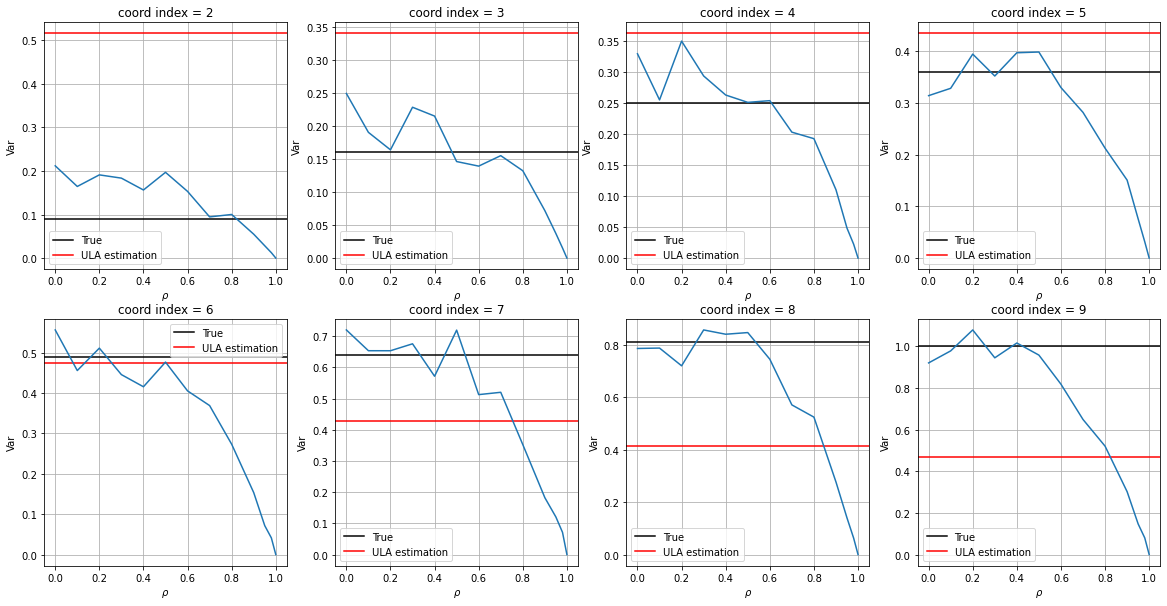

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
true_vars = (scales_target**2).cpu().numpy()
for i in range(8):
    row = i // 4
    col = i % 4
    ind = i + 2
    
    var_est = [var[j][ind] for j in range(len(var))]
    
    axs[row][col].axhline(true_vars[ind], label='True', color='black')
    axs[row][col].axhline(result_var_ula[ind], label='ULA estimation', color='red')
    axs[row][col].plot(rs, var_est)
    axs[row][col].set_ylabel(r'Var')
    axs[row][col].set_xlabel(r'$\rho$')
    axs[row][col].grid()
    axs[row][col].set_title(f"coord index = {ind}")
    axs[row][col].legend()


In [41]:
start = proposal.sample([batch_size])
history = langevin_dynamics(start, target.log_prob, proposal, n_steps, grad_step, eps_scale)

In [43]:
last_history_ula = history[-num_points_in_chain:]
result_ula = torch.stack(last_history_ula, 0)

result_np_ula = result_ula.detach().cpu().numpy()
result_var_ula = np.var(result_np_ula, axis = 0, ddof=1).mean(axis = 0)

In [45]:
result_var_ula

array([          nan, 3.0129802e+18, 5.1584023e-01, 3.4001857e-01,
       3.6170784e-01, 4.3446979e-01, 4.7530293e-01, 4.2758054e-01,
       4.1242829e-01, 4.6965843e-01], dtype=float32)

In [49]:
result_mean_ula = np.mean(result_np_ula, axis = 0).mean(axis = 0)

In [51]:
result_mean_ula

array([           nan, -3.3462864e+08,  3.9286470e+00,  4.0041370e+00,
        4.0056190e+00,  4.0361958e+00,  4.0313334e+00,  3.8779893e+00,
        4.0345516e+00,  3.6384594e+00], dtype=float32)

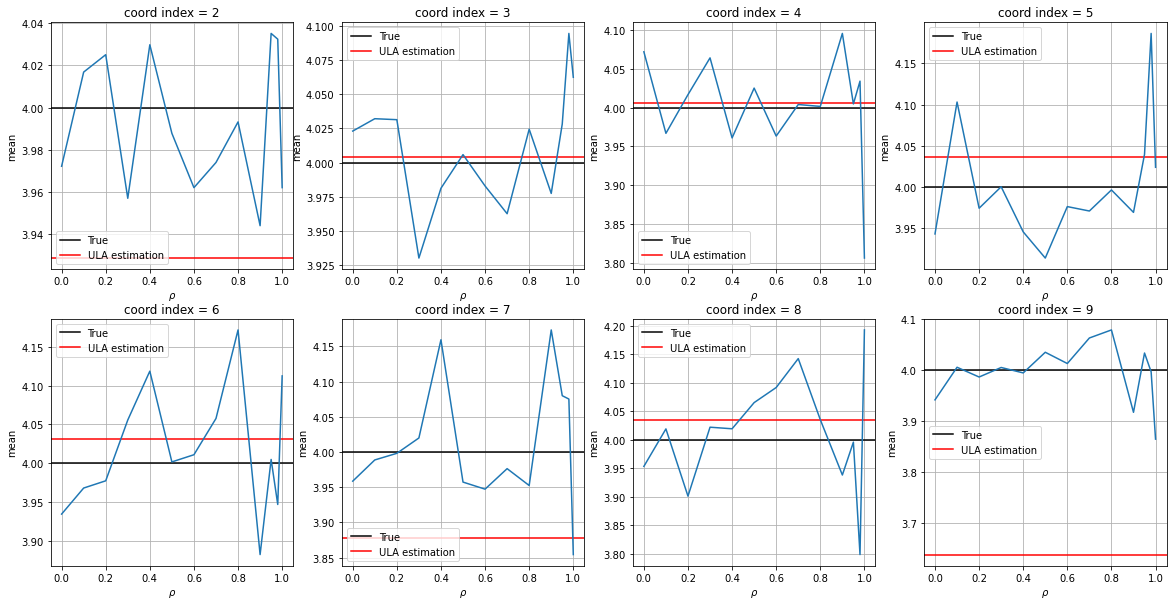

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
true_means = (locs_target).cpu().numpy()
for i in range(8):
    row = i // 4
    col = i % 4
    ind = i + 2
    
    mean_est = [mean[j][ind] for j in range(len(mean))]
    
    axs[row][col].axhline(true_means[ind], label='True', color='black')
    axs[row][col].axhline(result_mean_ula[ind], label='ULA estimation', color='red')
    axs[row][col].plot(rs, mean_est)
    axs[row][col].set_ylabel(r'mean')
    axs[row][col].set_xlabel(r'$\rho$')
    axs[row][col].grid()
    axs[row][col].set_title(f"coord index = {ind}")
    axs[row][col].legend()